# Data Summary and Businesss Problem

- Insert the data descriptions and the link etc.

# Model Prep

In [1]:
# load packages here
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.linear_model import LinearRegression
from scipy import stats

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from statsmodels.graphics.factorplots import interaction_plot

pd.set_option("display.max_columns", None)

# set seed
import random
random.seed(5600)

In [2]:
#Load in the data and store it as ride

ride_full = pd.read_csv('../../02_project/data/rideshare_subset.csv')

ride_full = ride_full.dropna().reset_index(drop = True)
ride_full.describe()

timestamp         hour          day        month        price  \
count  4.577000e+03  4577.000000  4577.000000  4577.000000  4577.000000   
mean   1.544055e+09    11.725803    17.716627    11.592528    16.577671   
std    6.892093e+05     6.960787     9.947628     0.491418     9.070030   
min    1.543204e+09     0.000000     1.000000    11.000000     2.500000   
25%    1.543445e+09     6.000000    13.000000    11.000000     9.500000   
50%    1.543746e+09    12.000000    17.000000    12.000000    14.000000   
75%    1.544831e+09    18.000000    28.000000    12.000000    22.500000   
max    1.545160e+09    23.000000    30.000000    12.000000    62.500000   

          distance  surge_multiplier     latitude    longitude  temperature  \
count  4577.000000       4577.000000  4577.000000  4577.000000  4577.000000   
mean      2.218396          1.014475    42.338177   -71.065831    39.674381   
std       1.132395          0.097195     0.048034     0.020318     6.851340   
min       0.030000          1.000000    42.214800   -71.105400    18.910000   
25%       1.340000          1.000000    42.350300   -71.081000    36.270000   
50%       2.210000          1.000000    42.351900   -71.063100    40.680000   
75%       2.960000          1.000000    42.364700   -71.054200    43.610000   
max       7.460000          2.500000    42.366100   -71.033000    57.220000   

       apparentTemperature  precipIntensity  precipProbability     humidity  \
count          4577.000000      4577.000000        4577.000000  4577.000000   
mean             36.018999         0.008880           0.143094     0.739600   
std               8.065333         0.027257           0.324053     0.137669   
min              12.130000         0.000000           0.000000     0.380000   
25%              31.910000         0.000000           0.000000     0.640000   
50%              36.010000         0.000000           0.000000     0.710000   
75%              40.720000         0.000000           0.000000     0.880000   
max              57.220000         0.144700           1.000000     0.960000   

         windSpeed     windGust  windGustTime   visibility  temperatureHigh  \
count  4577.000000  4577.000000  4.577000e+03  4577.000000      4577.000000   
mean      6.137035     8.420939  1.544058e+09     8.534505        45.110201   
std       3.152868     5.310053  6.936693e+05     2.527096         6.036917   
min       0.450000     0.800000  1.543151e+09     0.717000        32.680000   
25%       3.410000     4.060000  1.543432e+09     8.540000        42.570000   
50%       5.680000     7.330000  1.543756e+09     9.876000        44.680000   
75%       8.390000    11.740000  1.544846e+09     9.996000        47.060000   
max      15.000000    27.250000  1.545127e+09    10.000000        57.870000   

       temperatureHighTime  temperatureLow  temperatureLowTime  \
count         4.577000e+03     4577.000000        4.577000e+03   
mean          1.544058e+09       34.220793        1.544110e+09   
std           6.936789e+05        6.315467        6.920019e+05   
min           1.543154e+09       17.850000        1.543234e+09   
25%           1.543439e+09       30.170000        1.543489e+09   
50%           1.543788e+09       34.180000        1.543817e+09   
75%           1.544814e+09       38.880000        1.544836e+09   
max           1.545160e+09       46.600000        1.545221e+09   

       apparentTemperatureHigh  apparentTemperatureHighTime  \
count              4577.000000                 4.577000e+03   
mean                 41.714448                 1.544058e+09   
std                   7.700090                 6.940228e+05   
min                  22.620000                 1.543187e+09   
25%                  36.570000                 1.543439e+09   
50%                  41.380000                 1.543788e+09   
75%                  44.120000                 1.544818e+09   
max                  57.200000                 1.545160e+09   

       apparentTemperatureLow  appa

- One thing that stands out for me is that this data comes from two months that I can tell having the minimum month being 11 ( November) and the max is 12 (December). Going forward this may be good for us to determine holiday pricing for uber drivers rather than any time of the year.
- There is also a lot of columns that basically tell us the same thing about each type of weather (temp, precipitation, wind etc.) that could be condensed down.

In [3]:
#There is a lot of columns that we really do not need so we will trim downn the dataset 
columns_to_keep = ['price', 'hour', 'day', 'month', 'distance', 'surge_multiplier', 'apparentTemperature','precipProbability', 'windSpeed', 'name']

ride = ride_full[columns_to_keep]
ride.head()

price  hour  day  month  distance  surge_multiplier  apparentTemperature  \
0   11.0    14   14     12      3.07              1.00                33.90   
1    8.0    13   27     11      1.89              1.00                42.13   
2   11.0     0   27     11      1.74              1.25                39.94   
3   14.0    21    1     12      1.50              1.00                38.55   
4   22.5    21   26     11      3.21              1.00                41.62   

   precipProbability  windSpeed      name  
0               0.00       3.02      Lyft  
1               0.61       5.23  UberPool  
2               1.00       8.33      Lyft  
3               0.00       3.03    UberXL  
4               0.00       6.88       Lux

- These columns filter down the original columns and condenses them to the overall group (wind, precipitation, temp etc.)

In [4]:
#get the dummies for categorical data

ride_dummies = pd.get_dummies(data = ride, drop_first= True, dtype= int)
ride_dummies.columns

Index(['price', 'hour', 'day', 'month', 'distance', 'surge_multiplier',
       'apparentTemperature', 'precipProbability', 'windSpeed',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV'],
      dtype='object')

### Refference Columns
- name_black

# EDA

In [5]:
#verify the distribution of the name column across all kinds of ride share types
ride['name'].value_counts()

name
Black           408
UberX           408
WAV             401
Lux Black       394
UberXL          393
UberPool        386
Lyft XL         381
Black SUV       374
Lux             367
Lux Black XL    359
Shared          354
Lyft            352
Name: count, dtype: int64

- This is good to see that we have a fairly uniform distribution across the board for the different kinds of ubers and lyfts

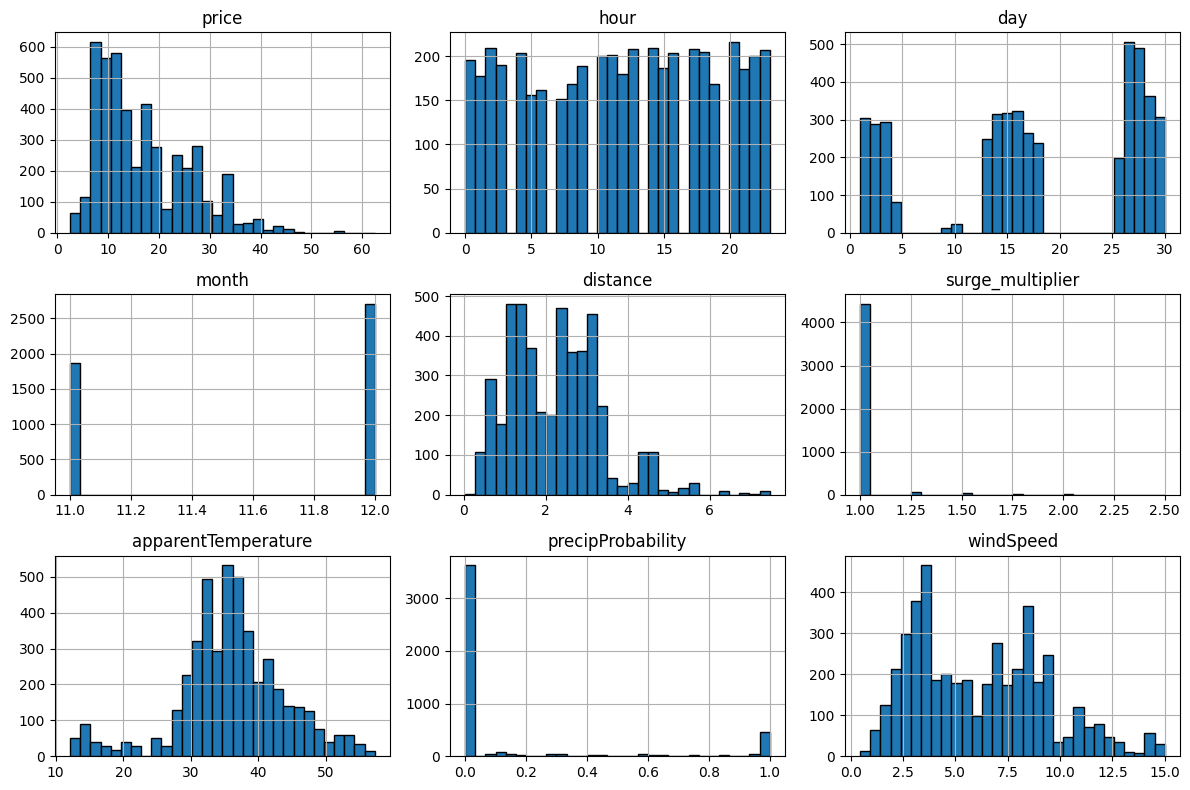

In [6]:
# Create histograms for each numerical column
ride.hist(figsize=(12, 8), bins=30, edgecolor='black')

plt.tight_layout() 
plt.show()

- Again here this confirms what we were seeing before about month, being only november and december. We will have to be cautious when predicting and interpreting prices outside this range.
- It is good to see that temperature, windspeed, and price are roughly normal. It is also good to see that hour is roughly uniform telling us we will have price data for all hours of the day for the most part.

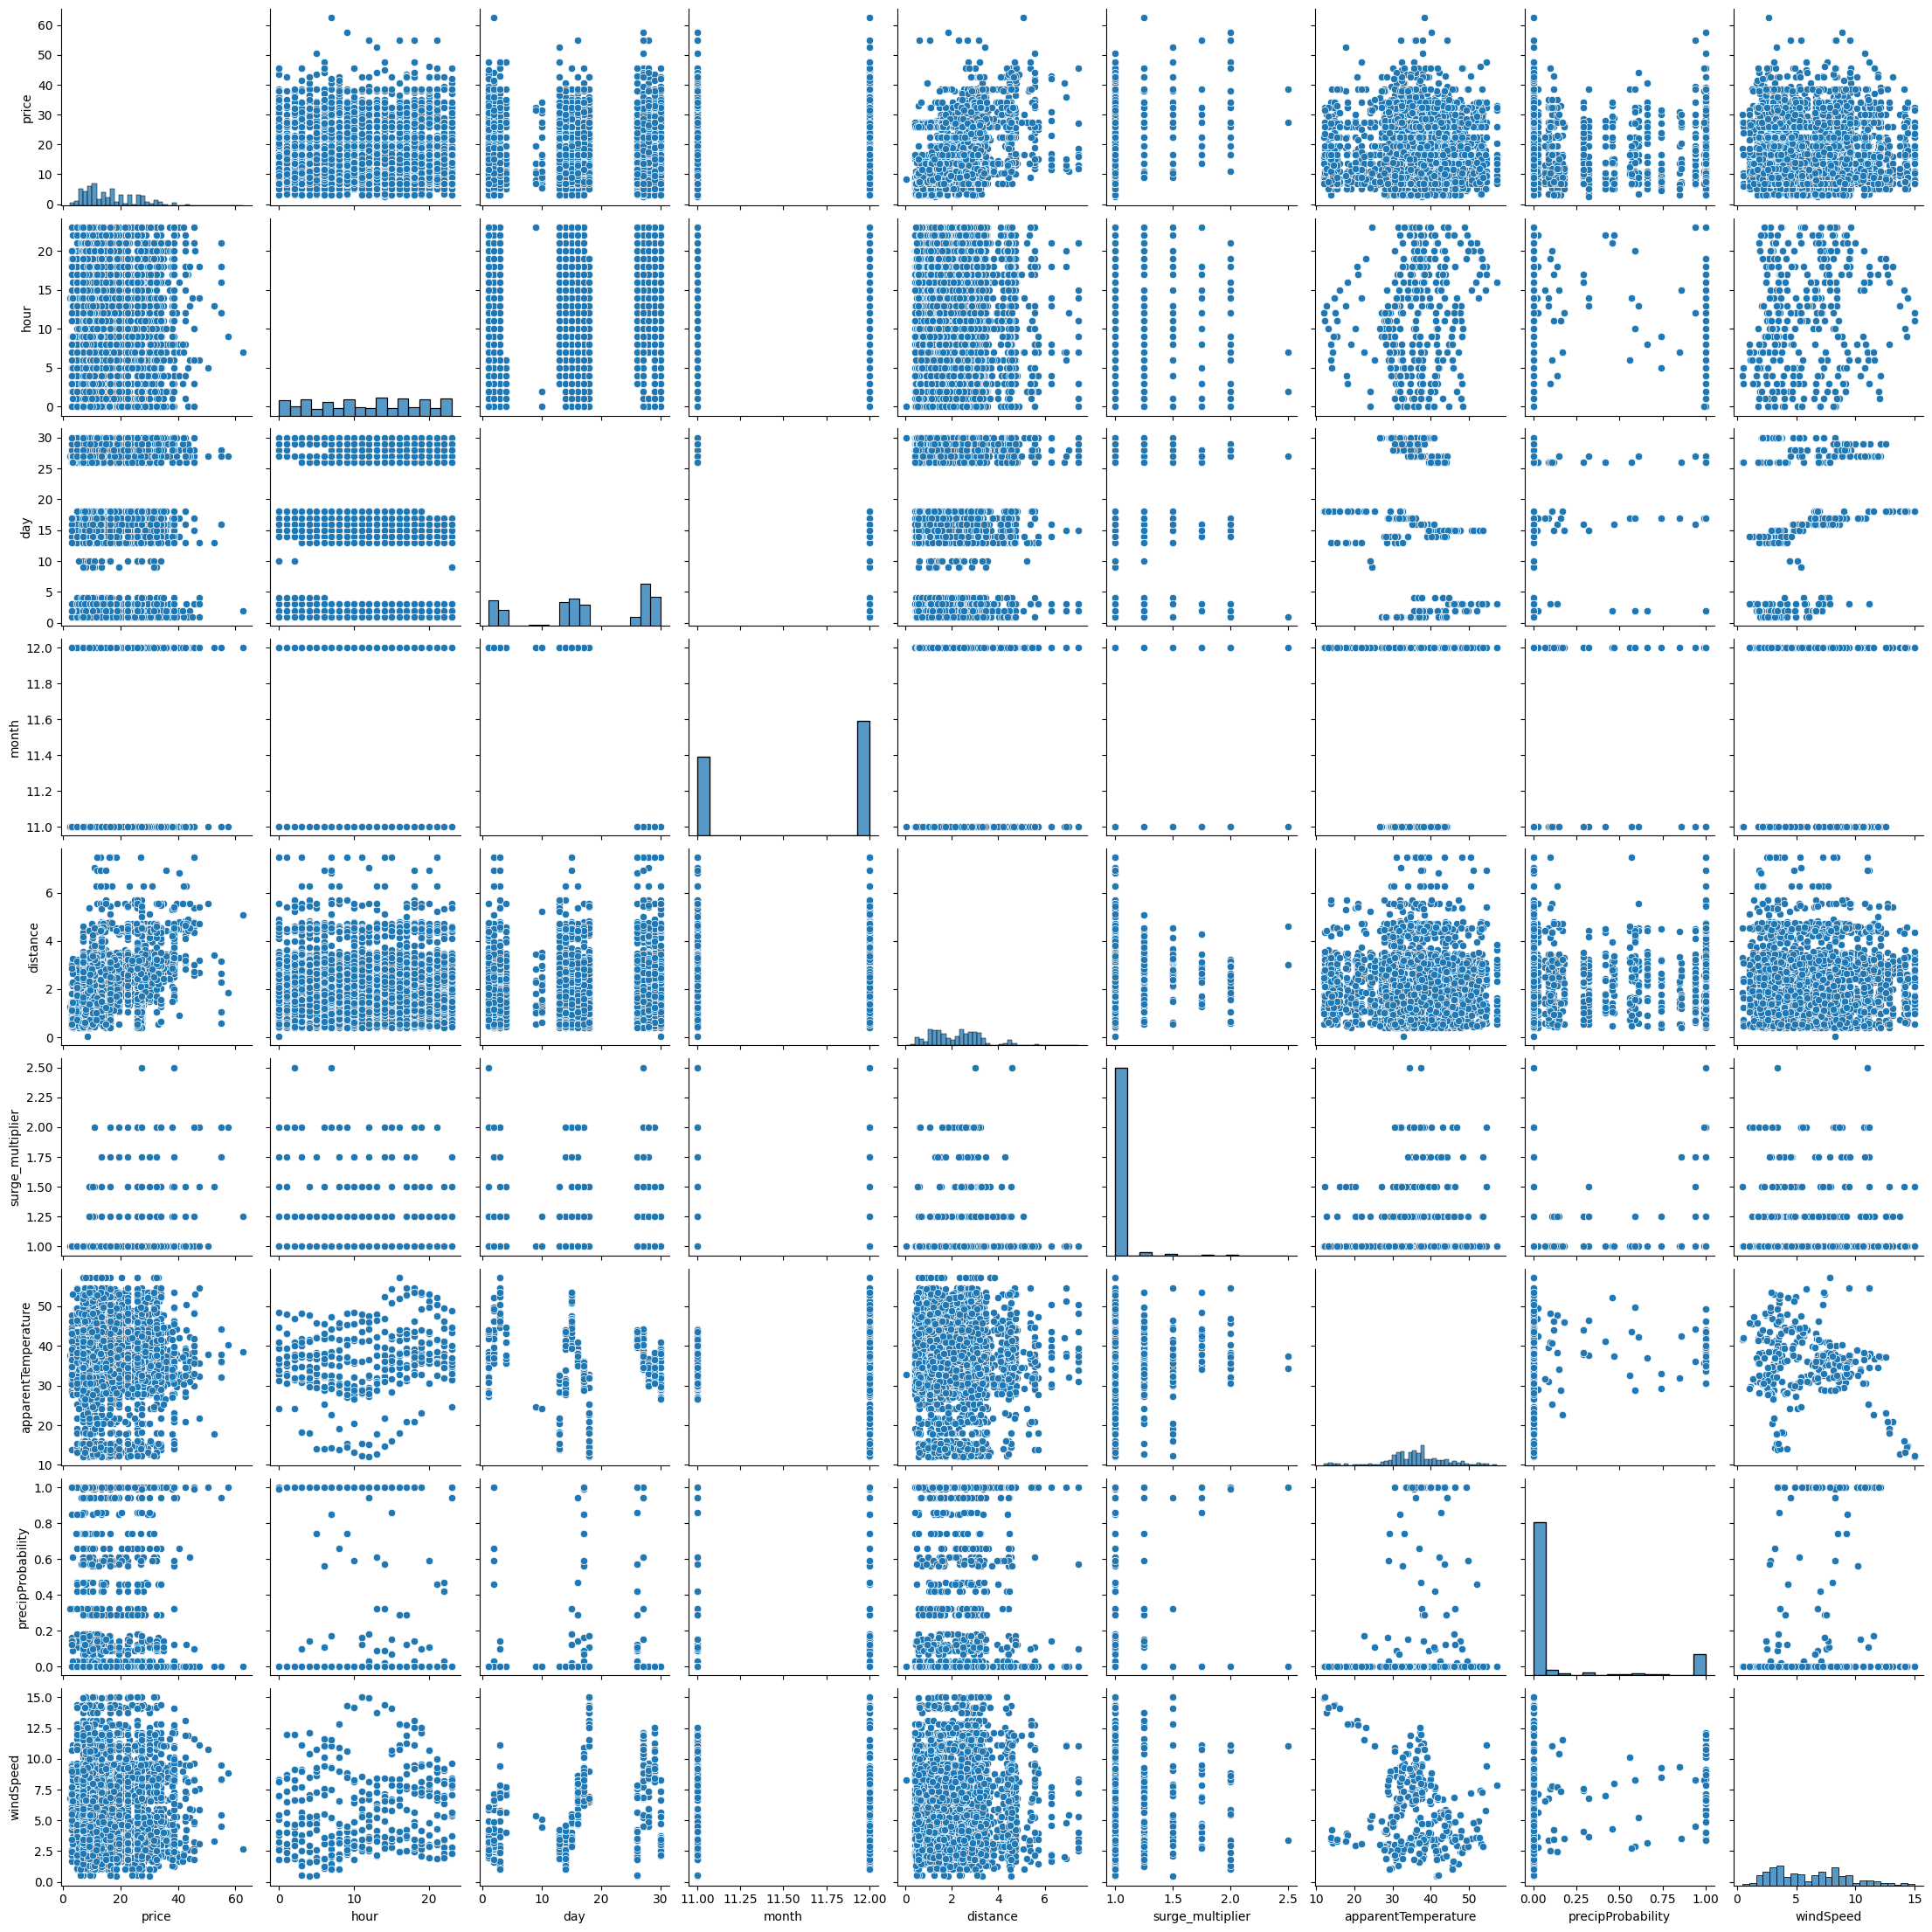

In [7]:
sns.pairplot(ride)

- Overall looking all vars compared with price it is slightly concening to see that most of our predictors do not have a linear realtionship with price. The only column that appears to have this somewhat linear relationship at the moment is distance with price, however it seems to be a weak positive relationship. There does not appear to be any variables that are colinear

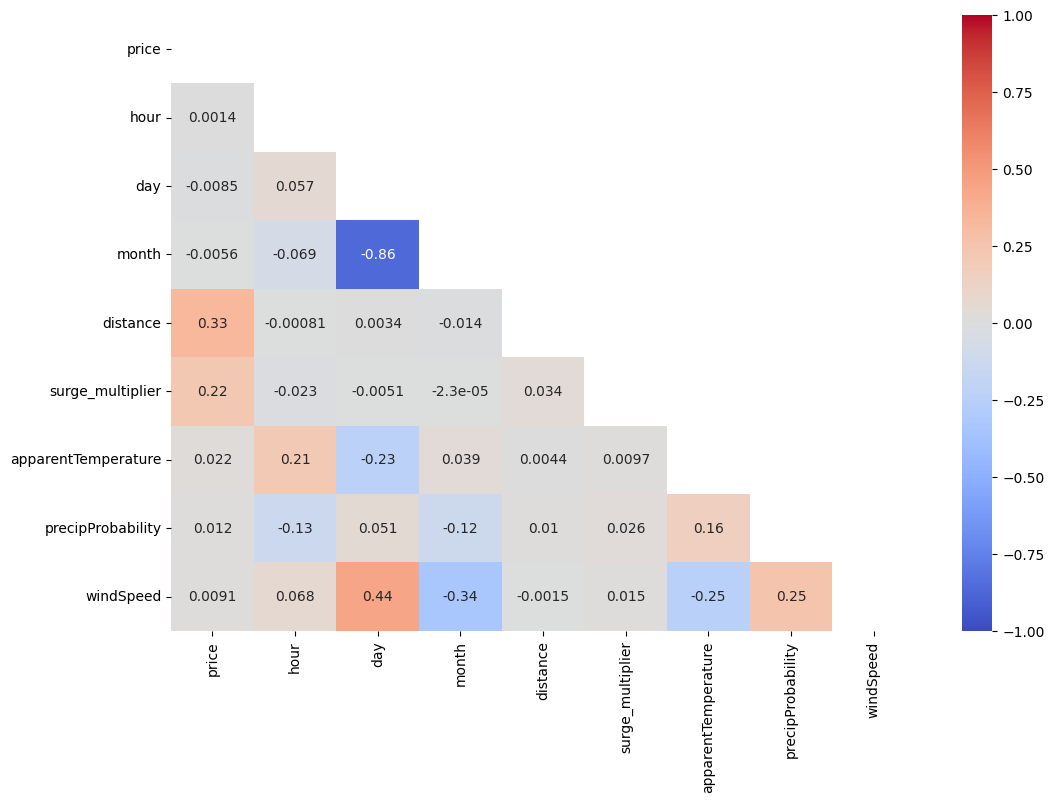

In [8]:
# Compute correlation matrix once
corr_matrix = ride.select_dtypes(include=['number']).corr()

# Set figure size before plotting
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(corr_matrix, 
            cmap='coolwarm',  # Color palette
            annot=True,  # Show correlation values
            vmin=-1, vmax=1,  # Normalize color scale
            mask=np.triu(corr_matrix))  # Hide upper triangle

plt.show()

- Some items that we are starting to notice may be causing possible issues of multicolinearity is day and hour. As far as varaibles that may be a good predictor of price based soley off this heat map is distance and surge_multiplier, as they have the highest positive relationship with price.

# Baseline Model

In [9]:
y = ride_dummies['price']
X = sm.add_constant(ride_dummies.iloc[:, 1:20]) 
mod = sm.OLS(y, X)
res = mod.fit()

ride_dummies['residuals'] = res.resid
ride_dummies['fittedvalues'] = res.fittedvalues

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     3229.
Date:                Tue, 18 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:46:33   Log-Likelihood:                -10472.
No. Observations:                4577   AIC:                         2.098e+04
Df Residuals:                    4557   BIC:                         2.111e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.9504      1.962     -2.523      0.012      -8.798      -1.103
hour                    0.0033      0.005      0.619      0.536      -0.007       0.014
day                     0.0062      0.008      0.791      0.429      -0.009       0.022
month                   0.1753      0.151      1.164      0.245      -0.120       0.471
distance                2.7200      0.031     87.021      0.000       2.659       2.781
surge_multiplier       16.7726      0.370     45.281      0.000      16.046      17.499
apparentTemperature     0.0063      0.005      1.245      0.213      -0.004       0.016
precipProbability      -0.0190      0.120     -0.158      0.874      -0.254       0.216
windSpeed               0.0085      0.013      0.631      0.528      -0.018       0.035
name_Black SUV         10.1780      0.171     59.477      0.000       9.843      10.514
name_Lux               -3.0410      0.173    -17.628      0.000      -3.379      -2.703
name_Lux Black          2.2936      0.169     13.549      0.000       1.962       2.625
name_Lux Black XL      11.2029      0.174     64.560      0.000      10.863      11.543
name_Lyft             -11.1636      0.175    -63.942      0.000     -11.506     -10.821
name_Lyft XL           -5.5172      0.171    -32.205      0.000      -5.853      -5.181
name_Shared           -13.9711      0.174    -80.405      0.000     -14.312     -13.630
name_UberPool         -11.4938      0.170    -67.624      0.000     -11.827     -11.161
name_UberX            -10.7168      0.167    -64.016      0.000     -11.045     -10.389
name_UberXL            -4.6733      0.169    -27.652      0.000      -5.005      -4.342
name_WAV              -10.5054      0.168    -62.479      0.000     -10.835     -10.176
==============================================================================
Omnibus:                     1414.883   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13616.547
Skew:                           1.193   Prob(JB):                         0.00
Kurtosis:                      11.106   Cond. No.                     2.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Though the initial model seems to be having a high $ R^2 $ value and has a significant f-statistic, when we start looking at significance at the predictor level the varaibales that are actually significant at this point are distance, surge_multiplier, and the name of the cab type. This is more than likely a theme we will start to see throughout the regualization steps

# Regularization and Variable Selection

### Sequential Replacement

In [10]:
seqrep_selection = SFS(LinearRegression(fit_intercept = True), 
                                        k_features = (1, len(X.columns)), 
                                        forward = True, 
                                        floating = True,
                                        scoring = 'neg_mean_squared_error',
                                        cv = 5)

seqrep = seqrep_selection.fit(X, y)

print('Sequential Replacement Stepwise Selection:', seqrep.k_feature_names_)

Sequential Replacement Stepwise Selection: ('const', 'distance', 'surge_multiplier', 'windSpeed', 'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV')


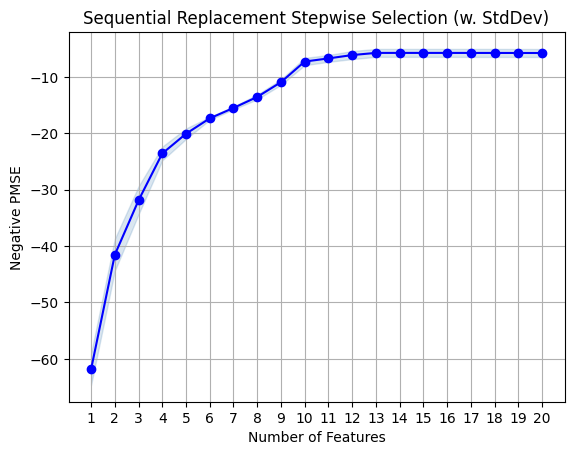

In [11]:
# Code to plot the (negative) PMSEs
fig1 = plot_sfs(seqrep.get_metric_dict(), kind = 'std_dev')
plt.title('Sequential Replacement Stepwise Selection (w. StdDev)')
plt.ylabel("Negative PMSE")
plt.grid()
plt.show()

In [12]:
# Code to see the next best models
seqrep_results = pd.DataFrame.from_dict(seqrep.get_metric_dict()).T
seqrep_results_sorted = seqrep_results.sort_values(by = 'avg_score', ascending = False)
seqrep_results_sorted.head(10)

feature_idx  \
15  (0, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17...   
14  (4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1...   
13  (4, 5, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)   
16  (0, 1, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16,...   
17  (0, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, ...   
18  (0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 1...   
19  (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...   
20  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
12      (4, 5, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19)   
11          (4, 5, 9, 11, 12, 13, 14, 15, 16, 17, 19)   

                                            cv_scores avg_score  \
15  [-5.895408861709316, -5.129896248390241, -6.84...  -5.74839   
14  [-5.8954088617093126, -5.129896248390246, -6.8...  -5.74839   
13  [-5.895364274318589, -5.130346417705384, -6.84... -5.748426   
16  [-5.899435200065594, -5.128695640232621, -6.84... -5.750614   
17  [-5.893747425547131, -5.135949261473027, -6.86... -5.754043   
18  [-5.897123964420268, -5.134828267911524, -6.86... -5.755836   
19  [-5.897452130573123, -5.136204533498748, -6.86... -5.760118   
20  [-5.9013317307697655, -5.157250198854057, -6.8... -5.766526   
12  [-6.344060386936098, -5.468742699669373, -7.24... -6.132847   
11  [-7.121242516892548, -6.173287500514865, -7.61... -6.726705   

                                        feature_names  ci_bound   std_dev  \
15  (const, distance, surge_multiplier, windSpeed,...  0.905046  0.704157   
14  (distance, surge_multiplier, windSpeed, name_B...  0.905046  0.704157   
13  (distance, surge_multiplier, name_Black SUV, n...  0.905344  0.704389   
16  (const, hour, distance, surge_multiplier, wind...  0.907447  0.706025   
17  (const, day, month, distance, surge_multiplier...  0.914174  0.711258   
18  (const, hour, day, month, distance, surge_mult...  0.916133  0.712782   
19  (const, hour, day, month, distance, surge_mult...  0.912094   0.70964   
20  (const, hour, day, month, distance, surge_mult...  0.909667  0.707752   
12  (distance, surge_multiplier, name_Black SUV, n...  0.917728  0.714023   
11  (distance, surge_multiplier, name_Black SUV, n...  0.779283  0.606309   

     std_err  
15  0.352078  
14  0.352078  
13  0.352194  
16  0.353012  
17  0.355629  
18  0.356391  
19   0.35482  
20  0.353876  
12  0.357012  
11  0.303154

- As we were seeing above the main vars that are showing up as relavent are distance, surge_multiplier and the names of the cab types. Wind speed is showing up in this type of selection however the difference in avg_score by not inlcuding it is only 0.000036 of a difference which is virtually nothing. It makes more sense to leave it out since we will not include any other weather information

### Elastic Net

In [13]:
# Create a list of possible alphas
potential_alphas = np.logspace(-4, 2, 500)

# run cross-validation to find the best alpha and l1_ratio
ElasticNetCV_model = ElasticNetCV(alphas = potential_alphas, 
                                  cv = 5, 
                                  random_state = 12345, 
                                  max_iter = 10000, 
                                  fit_intercept = True)
ElasticNetCV_model.fit(X, y)

# Get the list of alphas and corresponding MSEs
alphas = ElasticNetCV_model.alphas_
pmse_means = np.mean(ElasticNetCV_model.mse_path_, axis = 1)
pmse_std_error = np.std(ElasticNetCV_model.mse_path_, 
                        axis = 1,
                        ddof = 1) / np.sqrt(5)  # 5-fold CV

# Find the alpha that minimizes MSE
alpha_index_min = np.argmin(pmse_means)
alpha_min = alphas[alpha_index_min]

# Find the MSE that is one standard error away from the minimum MSE
one_se_above_min = min(pmse_means) + pmse_std_error[alpha_index_min]

# Find the largetst alpha with MSE less than or equal to one_se_above_min
alpha_index_1se = np.where(pmse_means <= one_se_above_min)[0][0]
alpha_1se = alphas[alpha_index_1se]

print("Minimum alpha:", alpha_min)
print("One SE alpha:", alpha_1se)

Minimum alpha: 0.00014734543096198358
One SE alpha: 0.005388438442608223


In [14]:
# Elastic Net results with lambda within one SE of the mean
en_1se = ElasticNet(alpha = alpha_1se,
                     fit_intercept = True)
en_1se.fit(X, y)

# Get coefficients
print(list(zip(en_1se.coef_, X)))

[(0.0, 'const'), (0.002740833991519517, 'hour'), (0.0010926996802982257, 'day'), (0.05294091698711146, 'month'), (2.719397101221421, 'distance'), (12.665467547988541, 'surge_multiplier'), (0.0063102968284347956, 'apparentTemperature'), (-0.0, 'precipProbability'), (0.009981433802641262, 'windSpeed'), (10.929768628854752, 'name_Black SUV'), (-1.670099853742771, 'name_Lux'), (3.419190433072189, 'name_Lux Black'), (12.029024925668743, 'name_Lux Black XL'), (-9.47817538113323, 'name_Lyft'), (-4.023347567031195, 'name_Lyft XL'), (-12.357549197798122, 'name_Shared'), (-9.994133645519245, 'name_UberPool'), (-9.261425313147022, 'name_UberX'), (-3.389174733771568, 'name_UberXL'), (-9.050479306764101, 'name_WAV')]


- Similar results to the sequential replacements method, we will move forward with the distance, surge_multiplier, and cab name.

### Variable Selection Summary

- Variables chosen:
    - Distance, Surge_Multiplier, name (with name_Black as a refference varaible for all other cab names.) 
    - Originally we wanted to see if different times of the day or other predictors such as the weather had a significant effect on the price of the ride share, but we can see that it really had no effect. This overall is better for our business problem as it really does simplyfy the amount of data needed to predict the price, and if it is fair or not.

# Rerun the Model With Best Variables Selected

In [15]:
#Create a new subset dataframe with the best vars chosen

ride_trim = ride[['price', 'distance', 'surge_multiplier', 'name']].dropna()
ride_trim = pd.get_dummies(ride_trim, drop_first= True, dtype= int)
ride_trim.head()

price  distance  surge_multiplier  name_Black SUV  name_Lux  \
0   11.0      3.07              1.00               0         0   
1    8.0      1.89              1.00               0         0   
2   11.0      1.74              1.25               0         0   
3   14.0      1.50              1.00               0         0   
4   22.5      3.21              1.00               0         1   

   name_Lux Black  name_Lux Black XL  name_Lyft  name_Lyft XL  name_Shared  \
0               0                  0          1             0            0   
1               0                  0          0             0            0   
2               0                  0          1             0            0   
3               0                  0          0             0            0   
4               0                  0          0             0            0   

   name_UberPool  name_UberX  name_UberXL  name_WAV  
0              0           0            0         0  
1              1           0            0         0  
2              0           0            0         0  
3              0           0            1         0  
4              0           0            0         0

In [16]:
#re-fit the model with the selected vars
y = ride_trim['price']
X = sm.add_constant(ride_trim.iloc[:, 1:14]) 

mod = sm.OLS(y, X)
res = mod.fit()

ride_trim['residuals'] = res.resid
ride_trim['fittedvalues'] = res.fittedvalues

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     4721.
Date:                Tue, 18 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:46:41   Log-Likelihood:                -10474.
No. Observations:                4577   AIC:                         2.098e+04
Df Residuals:                    4563   BIC:                         2.107e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4924      0.392     -6.355      0.000      -3.261      -1.723
distance              2.7191      0.031     87.040      0.000       2.658       2.780
surge_multiplier     16.7712      0.370     45.321      0.000      16.046      17.497
name_Black SUV       10.1802      0.171     59.513      0.000       9.845      10.516
name_Lux             -3.0344      0.172    -17.608      0.000      -3.372      -2.697
name_Lux Black        2.2961      0.169     13.578      0.000       1.965       2.628
name_Lux Black XL    11.2134      0.173     64.707      0.000      10.874      11.553
name_Lyft           -11.1630      0.175    -63.968      0.000     -11.505     -10.821
name_Lyft XL         -5.5108      0.171    -32.221      0.000      -5.846      -5.175
name_Shared         -13.9702      0.174    -80.491      0.000     -14.310     -13.630
name_UberPool       -11.4799      0.170    -67.658      0.000     -11.812     -11.147
name_UberX          -10.7150      0.167    -64.036      0.000     -11.043     -10.387
name_UberXL          -4.6685      0.169    -27.644      0.000      -5.000      -4.337
name_WAV            -10.4996      0.168    -62.482      0.000     -10.829     -10.170
==============================================================================
Omnibus:                     1403.965   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13366.827
Skew:                           1.185   Prob(JB):                         0.00
Kurtosis:                      11.030   Cond. No.                         42.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Right away we are starting to see that our predictor signifance has improved tremendously across all variables, suggesting that our varaible selection has improved the models predictive significance overall. We will still need to check assumptions and see the overall effectivness.

# Assumptions

## The X's vs Y are linear 

c:\Users\ksbuf\.pyenv\pyenv-win\versions\3.12.8\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


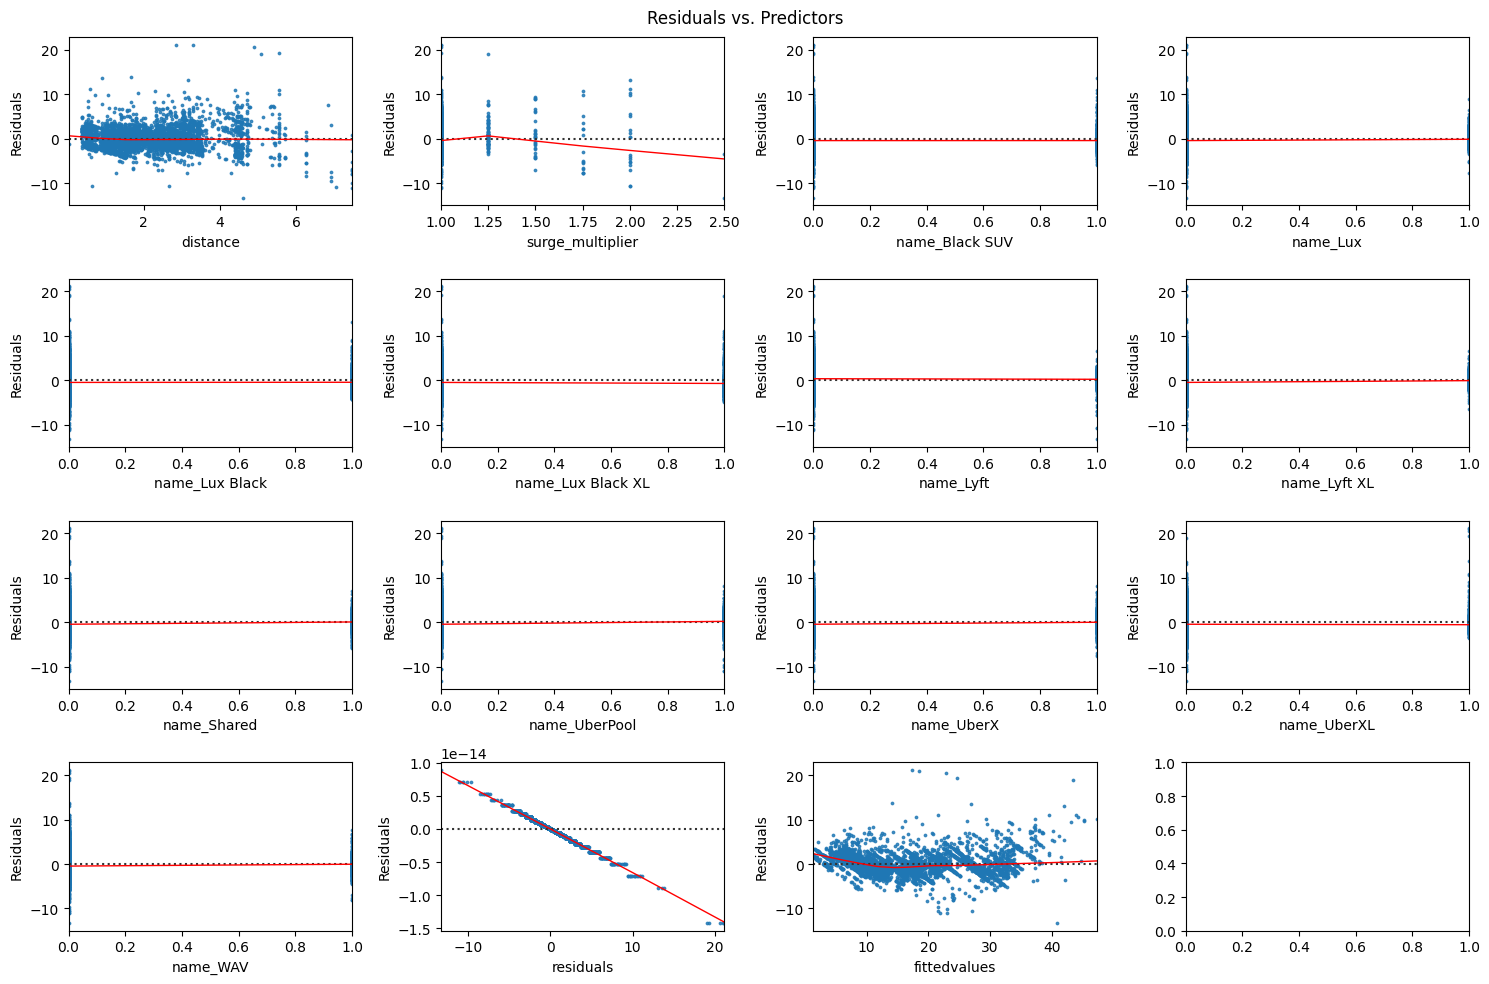

In [17]:
# Function to plot residuals vs. predictors
def res_vs_pred(variable, ax):
    sns.residplot(x=ride_trim[variable], 
                  y=ride_trim['residuals'],
                  lowess=True,
                  scatter_kws={'s': 3},
                  line_kws={'color': 'red', 'lw': 1},
                  ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel("Residuals")

# Define full list of predictors to plot
predictors = ride_trim.drop(columns = 'price', axis =1)

# Set up subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 10))
plt.suptitle("Residuals vs. Predictors")

# Loop through predictors and assign to subplots
for ax, predictor in zip(axes.flatten(), predictors):
    if predictor in ride_trim.columns:  # Ensure the variable exists before plotting
        res_vs_pred(predictor, ax)
    else:
        ax.set_visible(False)  # Hide subplot if variable is missing

fig.tight_layout()
plt.show()


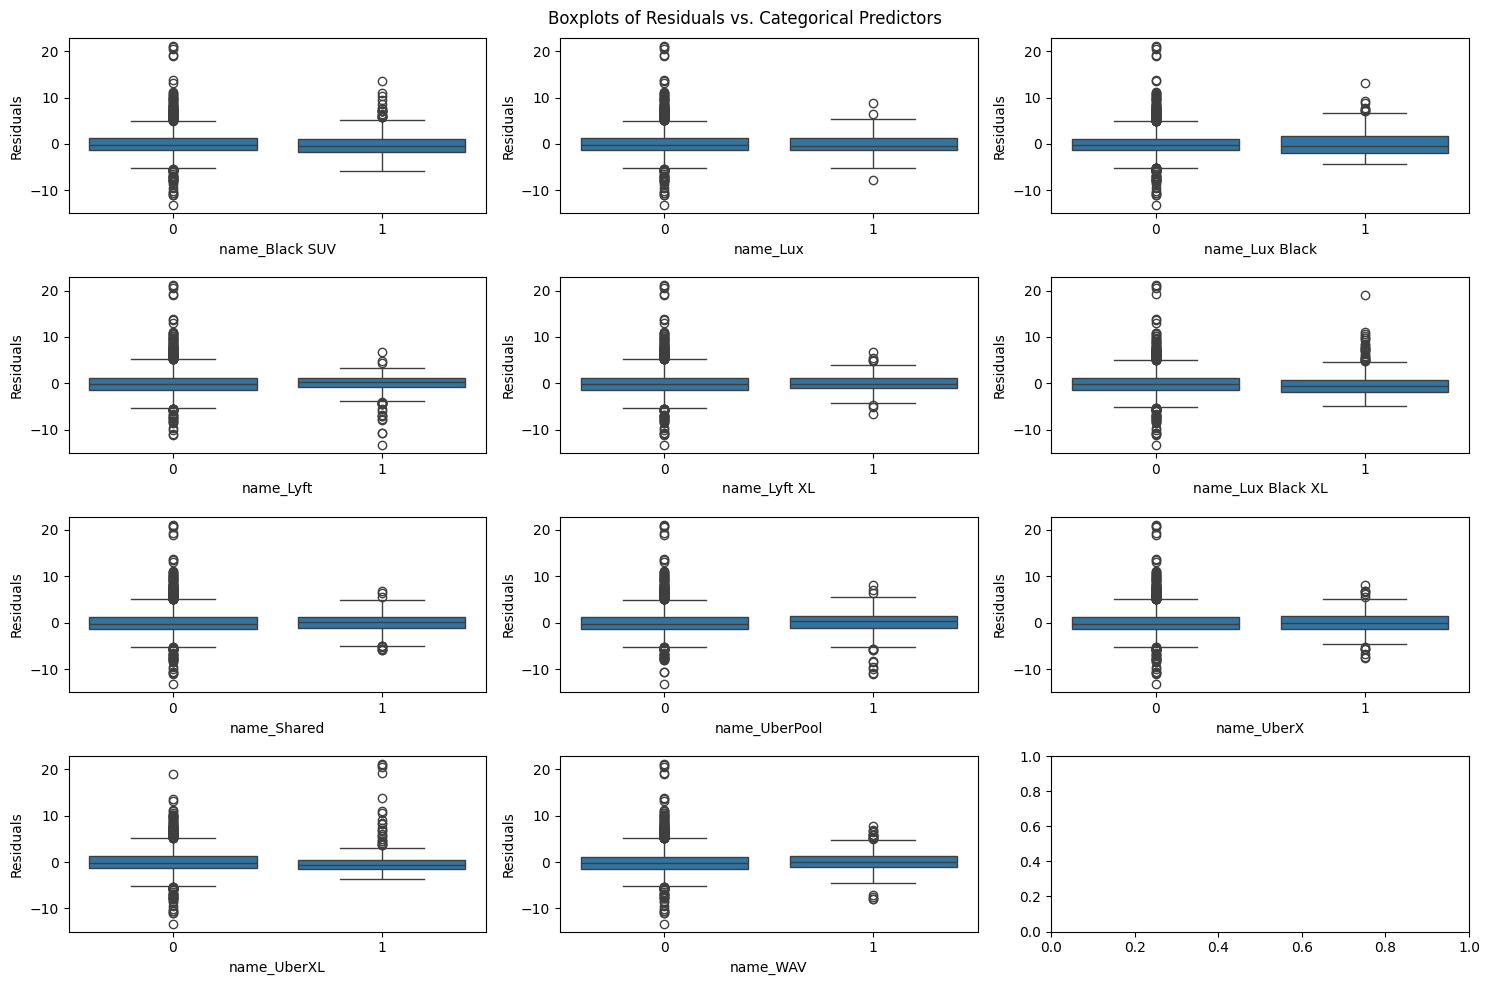

In [18]:

# Function to create box plot for categorical variables
def boxplot_residuals(variable, ax):
    sns.boxplot(x=ride_trim[variable], 
                y=ride_trim['residuals'], 
                ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel("Residuals")

# List of categorical predictors
categorical_predictors = [
    'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lyft', 'name_Lyft XL',
    'name_Lux Black XL', 'name_Shared', 
    'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV'
]

# Set up subplots for categorical predictors
fig, axes = plt.subplots(4, 3, figsize=(15, 10))
plt.suptitle("Boxplots of Residuals vs. Categorical Predictors")

# Loop through categorical predictors and assign to subplots
for ax, predictor in zip(axes.flatten(), categorical_predictors):
    if predictor in ride_trim.columns:  # Ensure the variable exists before plotting
        boxplot_residuals(predictor, ax)
    else:
        ax.set_visible(False)  # Hide subplot if variable is missing

fig.tight_layout()
plt.show()


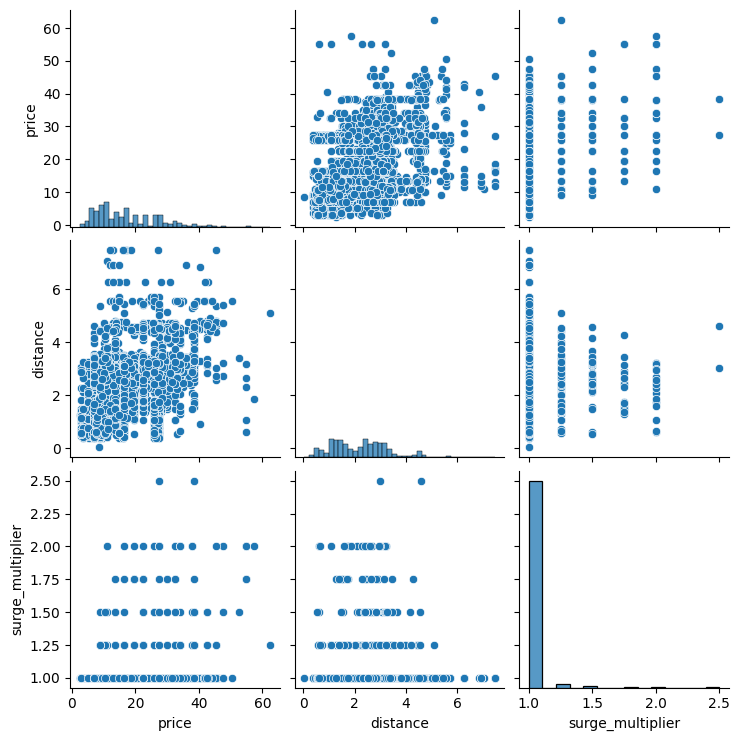

In [19]:

# Generate a scatterplot matrix of our numerical continuous data
sns.pairplot(ride_trim[['price','distance', 'surge_multiplier']])
plt.show()


### Section Summary

- This assumption is met

## The residuals are independent 

The residuals are independent. The data was collected randomly and then a subset was chosen from that data that records driving information for random Taxi service trips.

## The residuals are normally distributed and centered at zero 

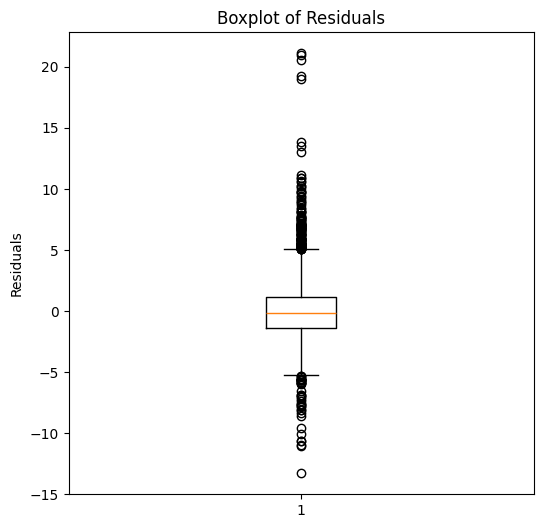

In [20]:
# Boxplot of residuals
fig = plt.figure(figsize=(6, 6))
plt.boxplot(ride_trim['residuals'])  # Use the residuals from your model
plt.ylabel("Residuals")
plt.title("Boxplot of Residuals")
plt.show()


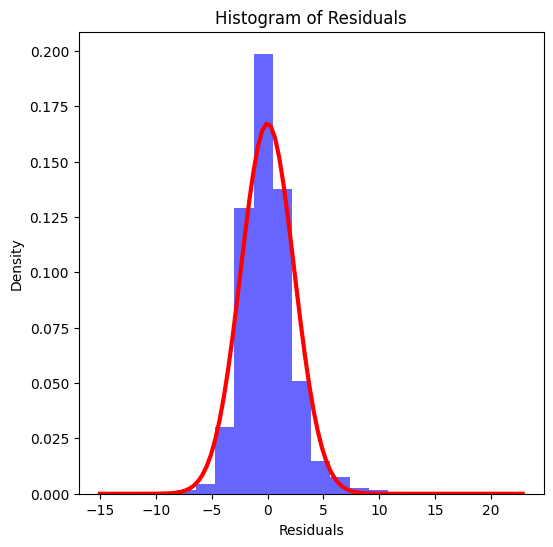

In [21]:


# Histogram of residuals from your model
fig = plt.figure(figsize=(6, 6))

# Plot histogram (density = True so that it's on the same scale as the normal distribution)
plt.hist(ride_trim['residuals'],  # Use residuals from the model
         density=True, 
         bins=20,  # Adjust the number of bins if necessary
         alpha=0.6, color='blue')

# Labeling the axes
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Histogram of Residuals")

# Calculate mean and standard deviation
mean = np.mean(ride_trim['residuals'])  # Mean of residuals
sd = np.std(ride_trim['residuals'])  # Standard deviation of residuals

# Generate x values to plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Plot normal distribution curve
plt.plot(x, 
         stats.norm.pdf(x, mean, sd), 
         color='red', lw=3)  # Red line for normal distribution

# Show 
plt.show()

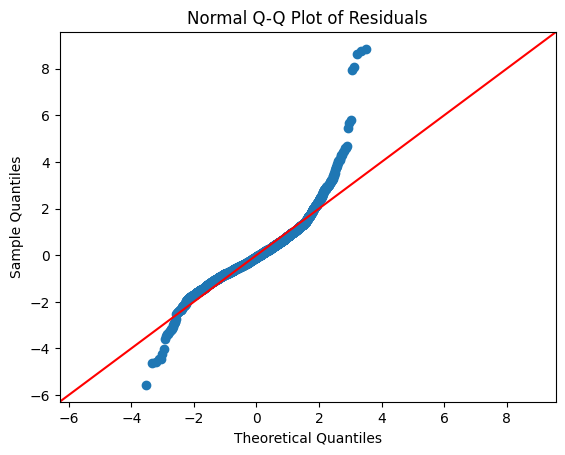

In [22]:
# Q-Q Plot (Normal Probability Plot) for residuals from your model
sm.qqplot(ride_trim['residuals'],  # Use residuals from the model
          line='45', 
          fit=True)

plt.title("Normal Q-Q Plot of Residuals")
plt.show()

### Section Summary

- This is not met, there is a lot of skew in our plots and the Q-Q plot is showing a lot of obvious shape and variation that is not accounted for.

##  The residuals have equal/constant variance across all values of X 

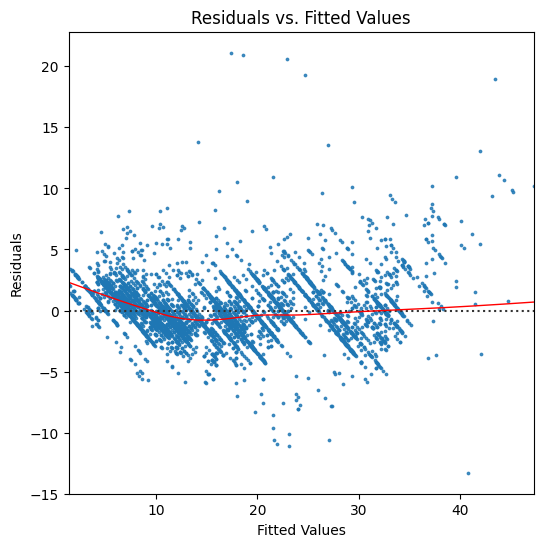

In [23]:

# Residuals vs. Fitted Values plot
fig = plt.figure(figsize=(6, 6))
sns.residplot(x=ride_trim['fittedvalues'], 
              y=ride_trim['residuals'],  
              lowess=True,
              scatter_kws={'s': 3},
              line_kws={'color': 'red', 'lw': 1})

# Labels and title
plt.title("Residuals vs. Fitted Values")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.show()


### Section Summary

- This is not great, and can be improved, but overall I would say it is met

## The model describes all observations 

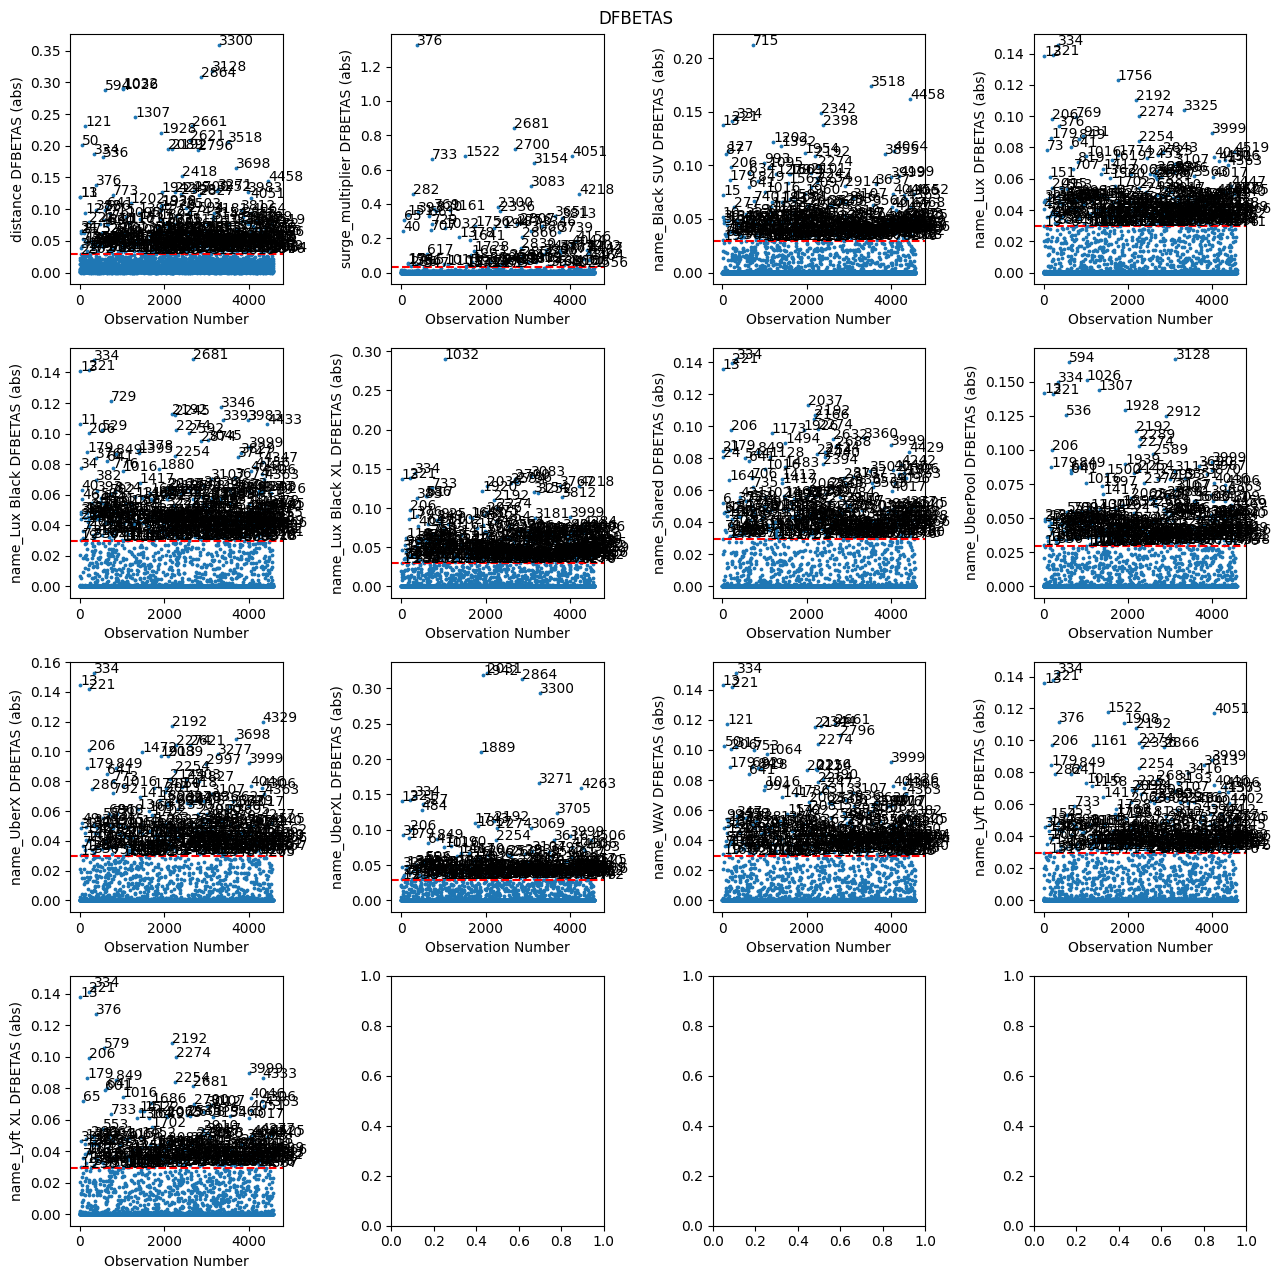

In [24]:
def plot_dfbetas(column, ax, dfbetas_data, label_level=2 / np.sqrt(len(ride_trim))):
    idx = ride_trim.columns.get_loc(column)
    dfbetas_values = dfbetas_data[:, idx]

    ax.set_ylabel(f"{column} DFBETAS (abs)")
    ax.set_xlabel("Observation Number")
    ax.scatter(ride_trim.index, np.abs(dfbetas_values), s=3)
    ax.axhline(y=label_level, color='r', linestyle='dashed')

    # Label outliers
    outliers = ride_trim.index[np.abs(dfbetas_values) > label_level]
    for i in outliers:
        ax.annotate(str(i), (i, np.abs(dfbetas_values[i])))

dfbetas_data = res.get_influence().dfbetas  # Compute once
# Create subplots (Updated grid size to accommodate all variables)
fig, axes = plt.subplots(4, 4, figsize=(13, 13))  # Now it's 3x3 to handle 8 plots
plt.suptitle("DFBETAS")


# Call the plot_dfbetas function for each of the desired columns
plot_dfbetas("distance", axes[0, 0], dfbetas_data)
plot_dfbetas("surge_multiplier", axes[0, 1], dfbetas_data)
plot_dfbetas("name_Black SUV", axes[0, 2], dfbetas_data)
plot_dfbetas("name_Lux", axes[0,3], dfbetas_data)
plot_dfbetas("name_Lux Black", axes[1, 0], dfbetas_data)
plot_dfbetas("name_Lux Black XL", axes[1, 1], dfbetas_data)
plot_dfbetas("name_Shared", axes[1, 2], dfbetas_data)
plot_dfbetas("name_UberPool", axes[1, 3], dfbetas_data)
plot_dfbetas("name_UberX", axes[2, 0], dfbetas_data)
plot_dfbetas("name_UberXL", axes[2, 1], dfbetas_data)
plot_dfbetas("name_WAV", axes[2, 2], dfbetas_data)
plot_dfbetas("name_Lyft", axes[2, 3], dfbetas_data)
plot_dfbetas("name_Lyft XL", axes[3, 0], dfbetas_data)

# Adjust layout and display the plot
fig.tight_layout()
plt.show()


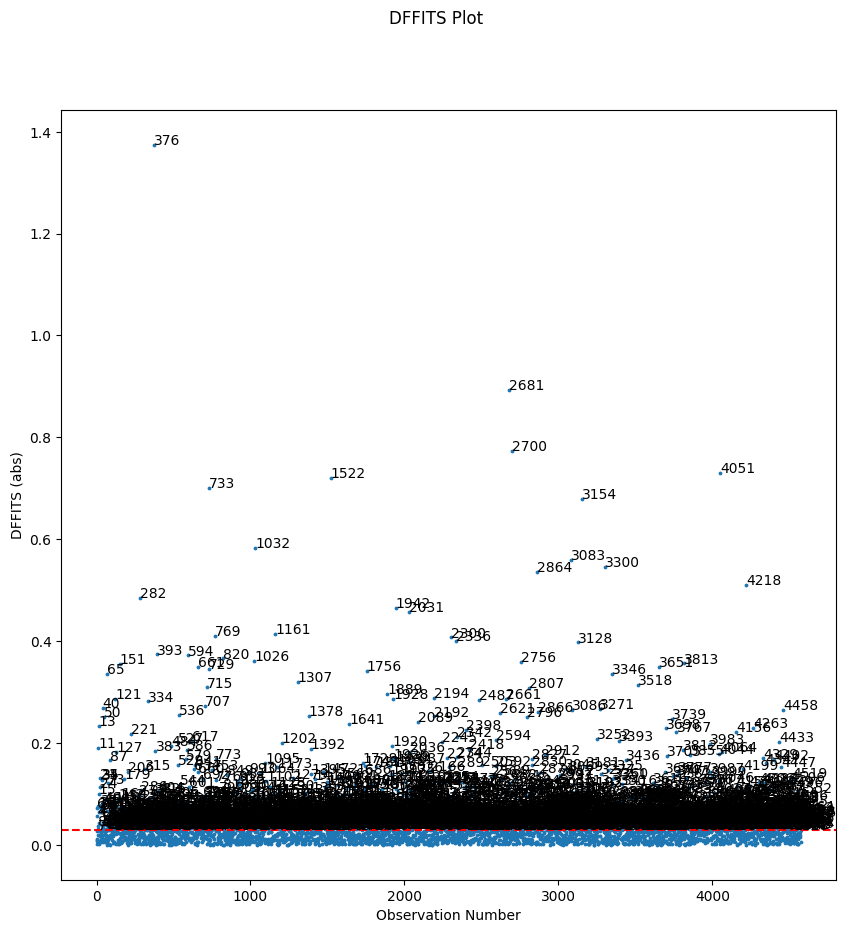

In [25]:
# DFFITS
def plot_dffits(ax, label_level=2 * np.sqrt(len(ride_trim)) / len(ride_trim)):
    # Calculate DFFITS for all observations
    ride_trim["dffits"] = res.get_influence().dffits[0]

    # Plot DFFITS values
    ax.set_ylabel("DFFITS (abs)")
    ax.set_xlabel("Observation Number")
    ax.scatter(ride_trim.index, np.abs(ride_trim["dffits"]), s=3)
    ax.axhline(y=label_level, color='r', linestyle='dashed')

    # Optional: label outliers
    outliers = ride_trim[np.abs(ride_trim["dffits"]) > label_level]
    for i in list(outliers.index):
        ax.annotate(str(i), (i, np.abs(ride_trim["dffits"][i])))

# Create figure
fig, ax = plt.subplots(figsize=(10, 10))
plt.suptitle("DFFITS Plot")

# Plot DFFITS
plot_dffits(ax)

plt.show()


In [26]:
# Store DFBETAS outliers in a dictionary
outliers_dfbetas_all = {}

# Compute DFBETAS once
dfbetas_data = res.get_influence().dfbetas  

# Define feature columns (excluding 'price')
desired_cols = ride_trim.columns[1:14]

# Set outlier threshold
label_level = 0.2 / np.sqrt(len(ride_trim))

# Iterate over each predictor
for i, column in enumerate(desired_cols):
    # Get DFBETAS values
    dfbetas_values = dfbetas_data[:, i]  
    
    # Store outliers
    outliers_dfbetas_all[column] = ride_trim[np.abs(dfbetas_values) > label_level]
    
# Example: Check distance outliers
outliers_dfbetas_all.get("distance", pd.DataFrame()).sort_values(by="distance", ascending=True).head()


price  distance  surge_multiplier  name_Black SUV  name_Lux  \
2483    7.0      0.39               1.0               0         0   
2759   16.0      0.39               1.0               0         0   
4348    7.0      0.39               1.0               0         0   
845     7.0      0.39               1.0               0         0   
2013    9.5      0.39               1.0               0         0   

      name_Lux Black  name_Lux Black XL  name_Lyft  name_Lyft XL  name_Shared  \
2483               0                  0          0             0            0   
2759               0                  0          0             0            0   
4348               0                  0          0             0            0   
845                0                  0          0             0            0   
2013               0                  0          0             0            0   

      name_UberPool  name_UberX  name_UberXL  name_WAV  residuals  \
2483              0           0            0         1   2.160298   
2759              0           0            0         0   0.660697   
4348              0           0            0         1   2.160298   
845               0           1            0         0   2.375665   
2013              0           1            0         0   4.875665   

      fittedvalues    dffits  
2483      4.839702  0.050518  
2759     15.339303  0.015209  
4348      4.839702  0.050518  
845       4.624335  0.055315  
2013      4.624335  0.113564

In [27]:
# Compute DFFITS
ride_trim['dffits'] = res.get_influence().dffits[0]

# Define DFFITS threshold
n, p = len(ride_trim), len(res.params)
dffits_threshold = 2 * np.sqrt(p / n)

# Identify DFFITS outliers
outliers_dffits = ride_trim[np.abs(ride_trim['dffits']) > dffits_threshold]

# Ensure desired columns exist before filtering
cols_to_keep = [col for col in desired_cols if col in ride_trim.columns] + ['dffits']
outliers_dffits_selected = outliers_dffits[cols_to_keep]

# Sort by DFFITS
outliers_dffits_sorted = outliers_dffits_selected.sort_values(by='dffits', ascending=True)

# Display top outliers
outliers_dffits_sorted.head()


distance  surge_multiplier  name_Black SUV  name_Lux  name_Lux Black  \
376       4.60              2.50               0         0               0   
4051      0.64              2.00               0         0               0   
1522      2.66              2.00               0         0               0   
282       2.49              2.00               0         0               0   
1161      4.28              1.75               0         0               0   

      name_Lux Black XL  name_Lyft  name_Lyft XL  name_Shared  name_UberPool  \
376                   0          1             0            0              0   
4051                  0          1             0            0              0   
1522                  0          1             0            0              0   
282                   0          1             0            0              0   
1161                  0          1             0            0              0   

      name_UberX  name_UberXL  name_WAV    dffits  
376            0            0         0 -1.374609  
4051           0            0         0 -0.730136  
1522           0            0         0 -0.719726  
282            0            0         0 -0.484509  
1161           0            0         0 -0.413562

### Section Summary

- This assumption is not met, there is so many variables that are not accounted for.

## Additional predictor variables are not required 

The dataset was very comprehensive. We beleive that this assumption is met. The variables we have are tested and important. And we started with possibly every predictor possible.

## No multicollinearity

In [28]:
## No multicollinearity
# Create a subset with the selected columns (including constant term)
X_selected = sm.add_constant(ride_dummies[desired_cols])

vif_data = pd.DataFrame()
vif_data['Feature'] = X_selected.columns  # The names of the features
vif_data['VIF'] = [vif(X_selected.values, i) for i in range(X_selected.shape[1])]  # Calculate VIF for each feature

# Display max and mean VIF
print("Max VIF = ", max(vif_data['VIF']))
print("Mean VIF = ", np.mean(vif_data['VIF']))

# Show the VIF DataFrame
print(vif_data)

Max VIF =  123.32784495620008
Mean VIF =  10.348761709580105
              Feature         VIF
0               const  123.327845
1            distance    1.003048
2    surge_multiplier    1.036844
3      name_Black SUV    1.760178
4            name_Lux    1.755885
5      name_Lux Black    1.803555
6   name_Lux Black XL    1.740255
7           name_Lyft    1.733173
8        name_Lyft XL    1.789596
9         name_Shared    1.723326
10      name_UberPool    1.782296
11         name_UberX    1.822451
12        name_UberXL    1.794664
13           name_WAV    1.809549


### Section Summary

- This is met


# Applying Transformations for unmet assumptions

- Based of our assumptions that were not met prior we are going to try and transform our y variable (price) in order to make it more normally distributed as well as try and reduce the extreme right skew of the surge multiplier and then refit the model.

In [29]:
#Refit the model with a transformed price
ride_trans = ride[['price', 'distance', 'surge_multiplier', 'name']].dropna()
ride_trans = pd.get_dummies(ride_trans, dtype= int, drop_first= True)
ride_trans['price'] = np.sqrt(ride_trans['price'])
ride_trans['surge_multiplier'] = np.log(ride_trans['surge_multiplier'])


In [30]:
#refit the model
#re-fit the model with the selected vars
y_trans = ride_trans['price']
X_trans = sm.add_constant(ride_trans.iloc[:, 1:14]) 

mod_trans = sm.OLS(y_trans, X_trans)
res_trans = mod_trans.fit()

ride_trans['residuals'] = res_trans.resid
ride_trans['fittedvalues'] = res_trans.fittedvalues

res_trans.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     6252.
Date:                Tue, 18 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:47:44   Log-Likelihood:                -128.28
No. Observations:                4577   AIC:                             284.6
Df Residuals:                    4563   BIC:                             374.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.7559      0.014    263.345      0.000       3.728       3.784
distance              0.3262      0.003    100.106      0.000       0.320       0.333
surge_multiplier      2.3056      0.052     43.997      0.000       2.203       2.408
name_Black SUV        1.0324      0.018     57.863      0.000       0.997       1.067
name_Lux             -0.3576      0.018    -19.890      0.000      -0.393      -0.322
name_Lux Black        0.2353      0.018     13.336      0.000       0.201       0.270
name_Lux Black XL     1.1005      0.018     60.857      0.000       1.065       1.136
name_Lyft            -1.4422      0.018    -79.212      0.000      -1.478      -1.407
name_Lyft XL         -0.6611      0.018    -37.042      0.000      -0.696      -0.626
name_Shared          -2.0136      0.018   -111.225      0.000      -2.049      -1.978
name_UberPool        -1.5211      0.018    -85.948      0.000      -1.556      -1.486
name_UberX           -1.3924      0.017    -79.777      0.000      -1.427      -1.358
name_UberXL          -0.5626      0.018    -31.936      0.000      -0.597      -0.528
name_WAV             -1.3638      0.018    -77.810      0.000      -1.398      -1.329
==============================================================================
Omnibus:                      983.132   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5894.383
Skew:                           0.888   Prob(JB):                         0.00
Kurtosis:                       8.268   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## The X's vs Y are linear 

c:\Users\ksbuf\.pyenv\pyenv-win\versions\3.12.8\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


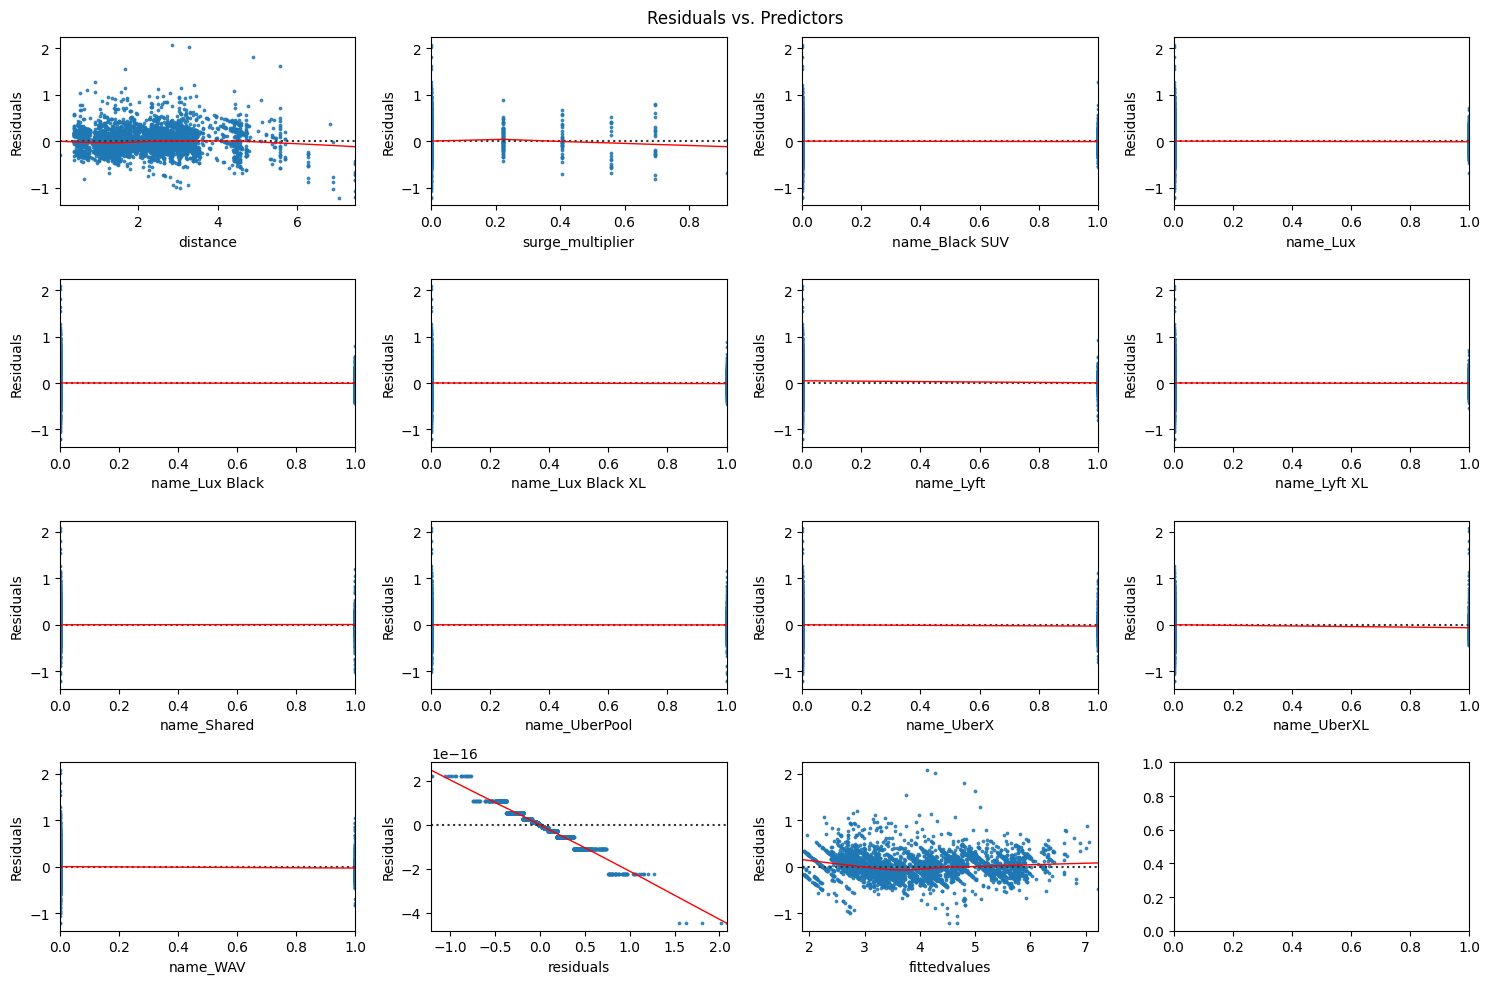

In [31]:
# Function to plot residuals vs. predictors
def res_vs_pred(variable, ax):
    sns.residplot(x=ride_trans[variable], 
                  y=ride_trans['residuals'],
                  lowess=True,
                  scatter_kws={'s': 3},
                  line_kws={'color': 'red', 'lw': 1},
                  ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel("Residuals")

# Define full list of predictors to plot
predictors = ride_trans.drop(columns = 'price', axis =1)

# Set up subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 10))
plt.suptitle("Residuals vs. Predictors")

# Loop through predictors and assign to subplots
for ax, predictor in zip(axes.flatten(), predictors):
    if predictor in ride_trans.columns:  # Ensure the variable exists before plotting
        res_vs_pred(predictor, ax)
    else:
        ax.set_visible(False)  # Hide subplot if variable is missing

fig.tight_layout()
plt.show()


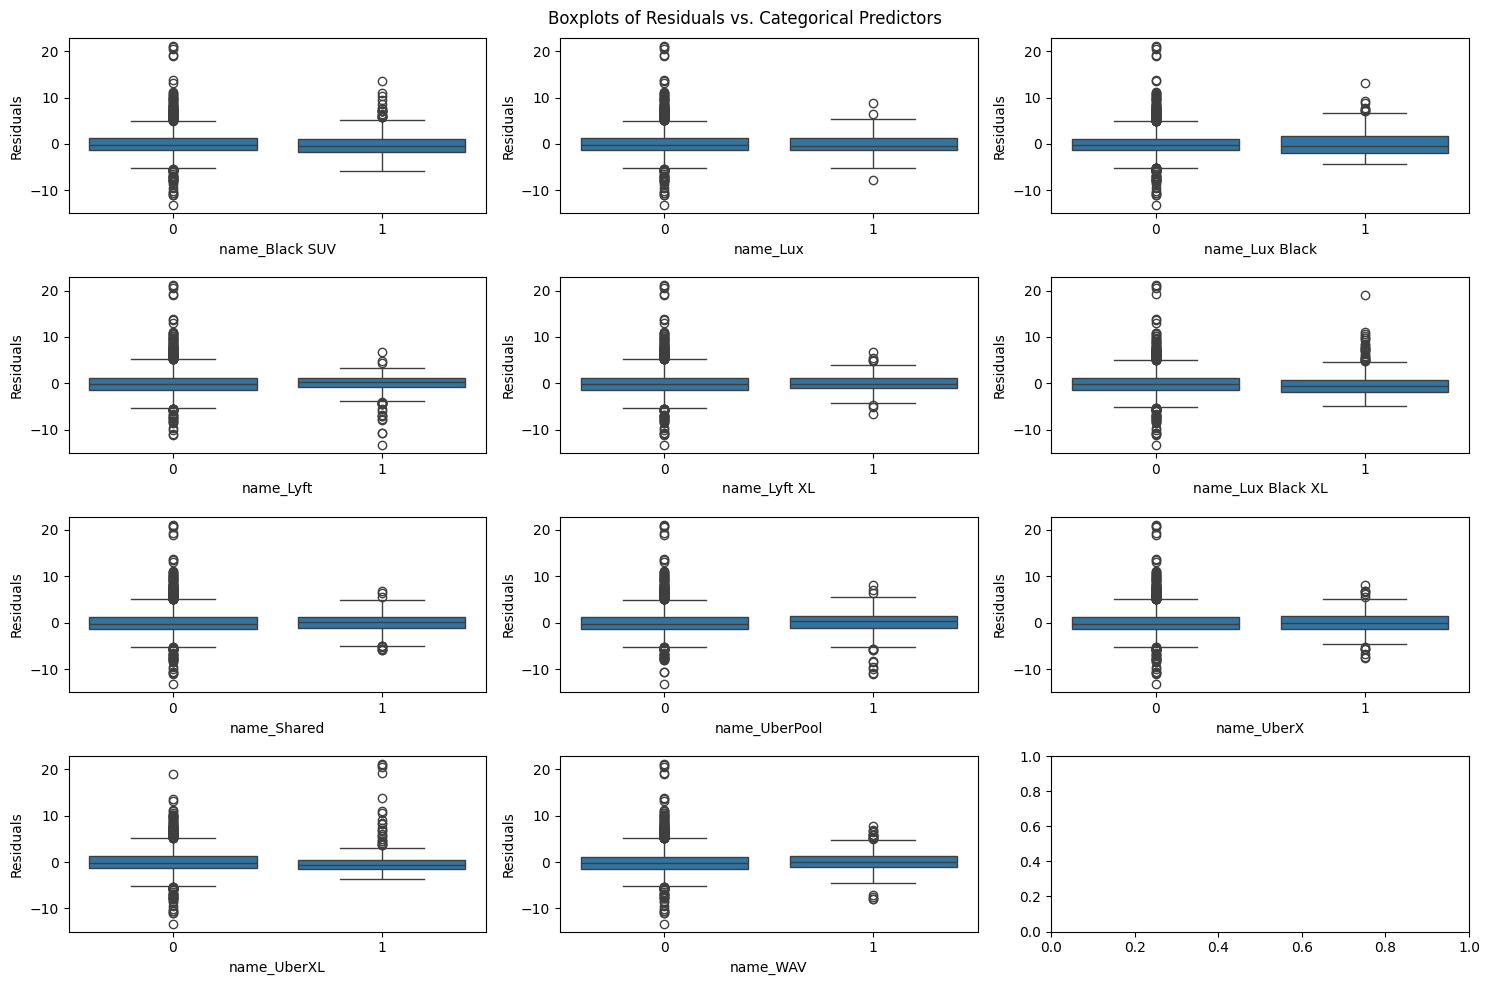

In [32]:

# Function to create box plot for categorical variables
def boxplot_residuals(variable, ax):
    sns.boxplot(x=ride_trim[variable], 
                y=ride_trim['residuals'], 
                ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel("Residuals")

# List of categorical predictors
categorical_predictors = [
    'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lyft', 'name_Lyft XL',
    'name_Lux Black XL', 'name_Shared', 
    'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV'
]

# Set up subplots for categorical predictors
fig, axes = plt.subplots(4, 3, figsize=(15, 10))
plt.suptitle("Boxplots of Residuals vs. Categorical Predictors")

# Loop through categorical predictors and assign to subplots
for ax, predictor in zip(axes.flatten(), categorical_predictors):
    if predictor in ride_trim.columns:  # Ensure the variable exists before plotting
        boxplot_residuals(predictor, ax)
    else:
        ax.set_visible(False)  # Hide subplot if variable is missing

fig.tight_layout()
plt.show()


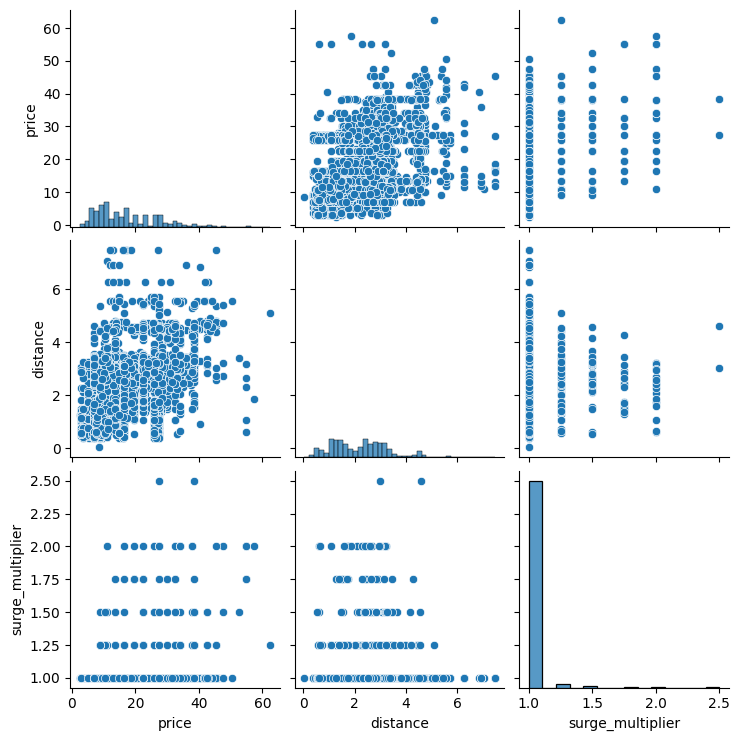

In [33]:

# Generate a scatterplot matrix of our numerical continuous data
sns.pairplot(ride_trim[['price','distance', 'surge_multiplier']])
plt.show()


#### Assumption Met?
- This improved slightly and overall I would say that this assumption is met

## The residuals are normally distributed and centered at zero 

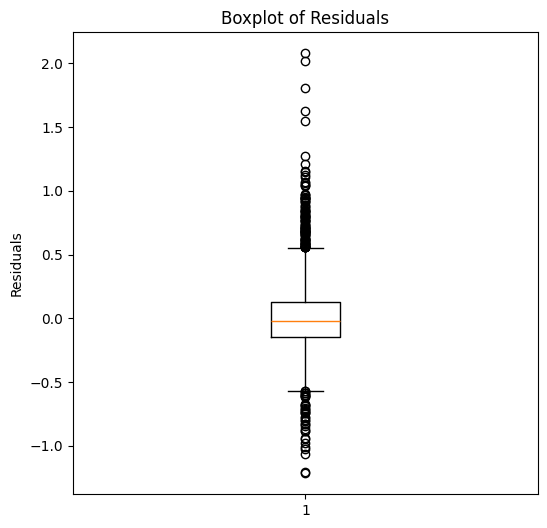

In [34]:


# Boxplot of residuals
fig = plt.figure(figsize=(6, 6))
plt.boxplot(ride_trans['residuals'])  # Use the residuals from your model
plt.ylabel("Residuals")
plt.title("Boxplot of Residuals")
plt.show()

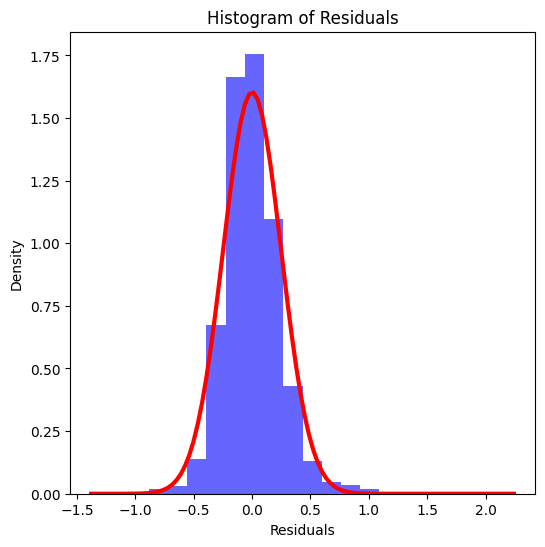

In [35]:

# Histogram of residuals from your model
fig = plt.figure(figsize=(6, 6))

# Plot histogram (density = True so that it's on the same scale as the normal distribution)
plt.hist(ride_trans['residuals'],  # Use residuals from the model
         density=True, 
         bins=20,  # Adjust the number of bins if necessary
         alpha=0.6, color='blue')

# Labeling the axes
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Histogram of Residuals")

# Calculate mean and standard deviation
mean = np.mean(ride_trans['residuals'])  # Mean of residuals
sd = np.std(ride_trans['residuals'])  # Standard deviation of residuals

# Generate x values to plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Plot normal distribution curve
plt.plot(x, 
         stats.norm.pdf(x, mean, sd), 
         color='red', lw=3)  # Red line for normal distribution

# Show 
plt.show()

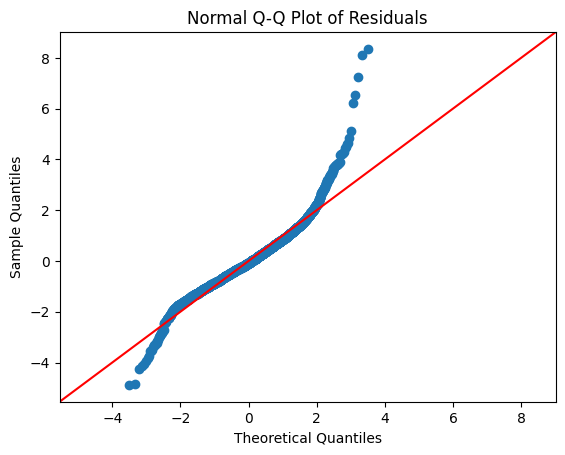

In [36]:
# Q-Q Plot (Normal Probability Plot) for residuals from your model
sm.qqplot(ride_trans['residuals'],  # Use residuals from the model
          line='45', 
          fit=True)

plt.title("Normal Q-Q Plot of Residuals")
plt.show()

#### Assumption Met?
- Overall this looks very similar to before and I would say that this assumption is still not met, there is still some obvious variation going on that is not being account for in the model.

##  The residuals have equal/constant variance across all values of X 

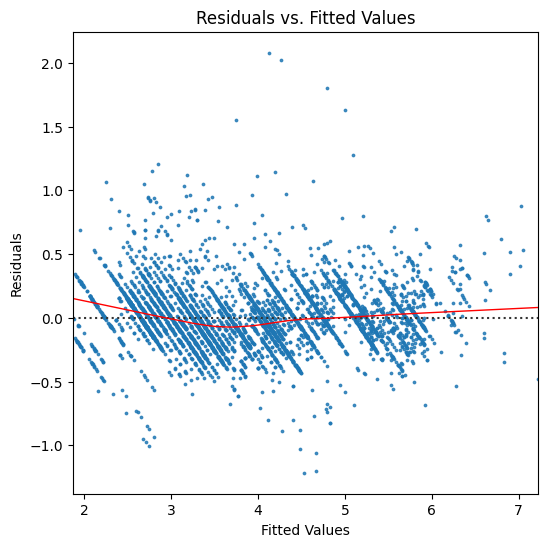

In [37]:
# Residuals vs. Fitted Values plot
fig = plt.figure(figsize=(6, 6))
sns.residplot(x=ride_trans['fittedvalues'], 
              y=ride_trans['residuals'],  
              lowess=True,
              scatter_kws={'s': 3},
              line_kws={'color': 'red', 'lw': 1})

# Labels and title
plt.title("Residuals vs. Fitted Values")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.show()

#### Assumption met? 
- This could be better overall, but I would say this is met

## The model describes all observations 

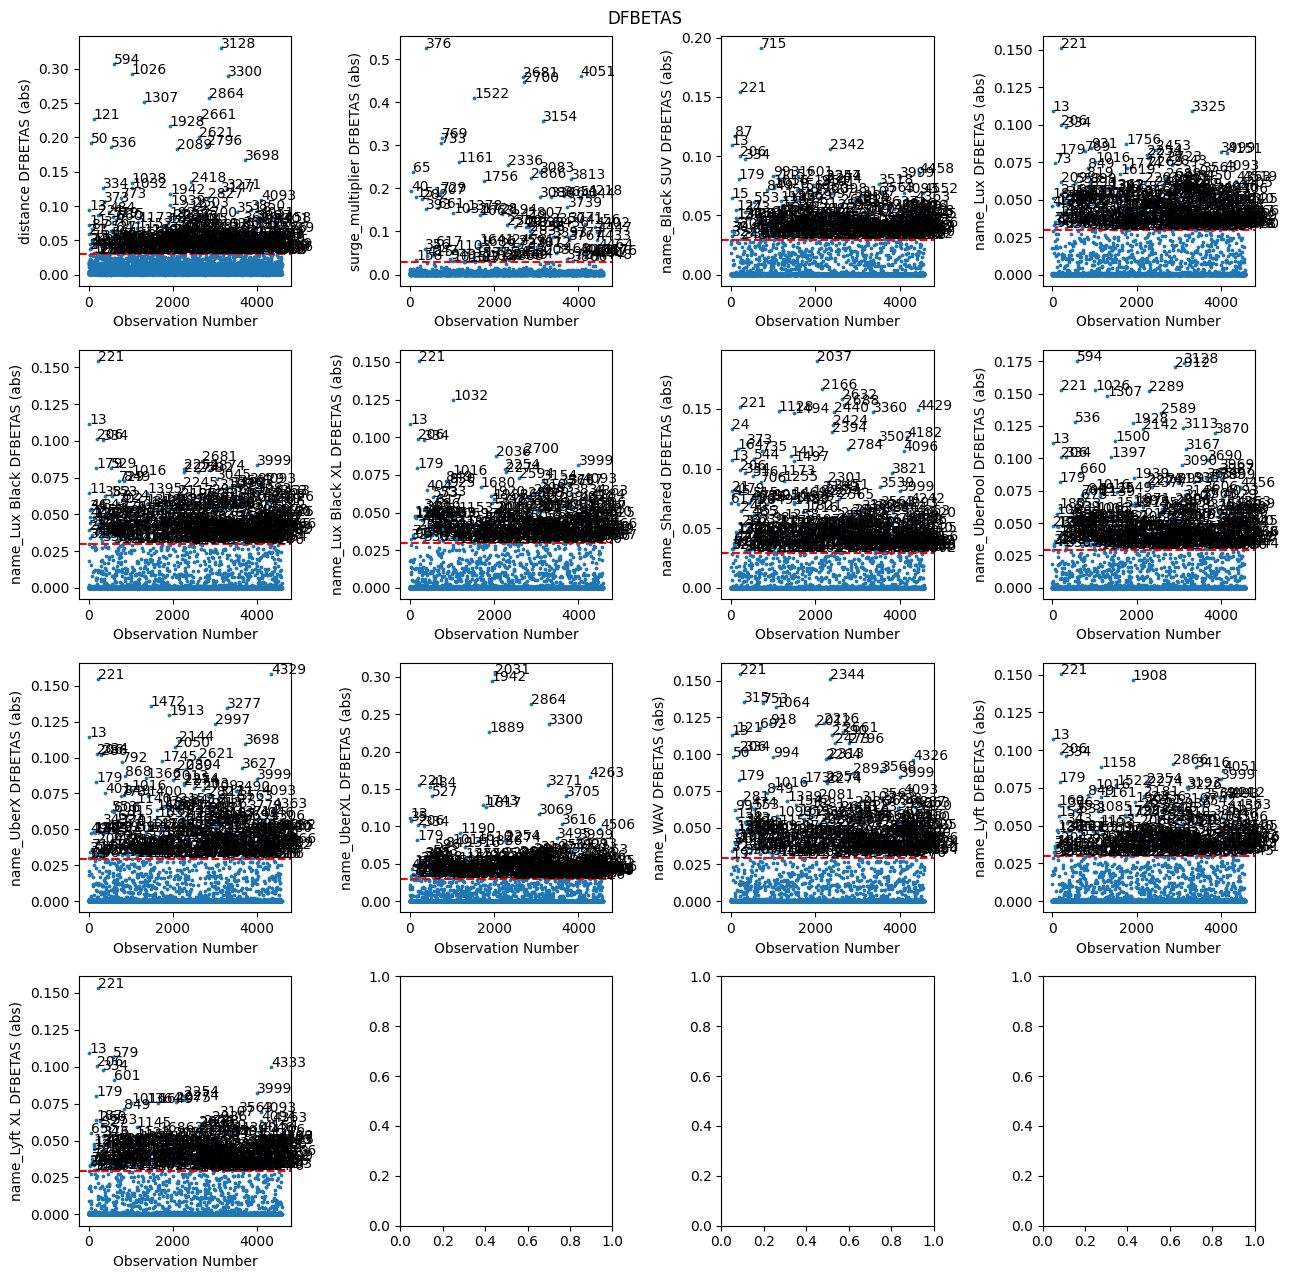

In [38]:


def plot_dfbetas(column, ax, dfbetas_data, label_level=2 / np.sqrt(len(ride_trans))):
    idx = ride_trans.columns.get_loc(column)
    dfbetas_values = dfbetas_data[:, idx]

    ax.set_ylabel(f"{column} DFBETAS (abs)")
    ax.set_xlabel("Observation Number")
    ax.scatter(ride_trans.index, np.abs(dfbetas_values), s=3)
    ax.axhline(y=label_level, color='r', linestyle='dashed')

    # Label outliers
    outliers = ride_trans.index[np.abs(dfbetas_values) > label_level]
    for i in outliers:
        ax.annotate(str(i), (i, np.abs(dfbetas_values[i])))

dfbetas_data = res_trans.get_influence().dfbetas  # Compute once
# Create subplots (Updated grid size to accommodate all variables)
fig, axes = plt.subplots(4, 4, figsize=(13, 13))  # Now it's 3x3 to handle 8 plots
plt.suptitle("DFBETAS")


# Call the plot_dfbetas function for each of the desired columns
plot_dfbetas("distance", axes[0, 0], dfbetas_data)
plot_dfbetas("surge_multiplier", axes[0, 1], dfbetas_data)
plot_dfbetas("name_Black SUV", axes[0, 2], dfbetas_data)
plot_dfbetas("name_Lux", axes[0,3], dfbetas_data)
plot_dfbetas("name_Lux Black", axes[1, 0], dfbetas_data)
plot_dfbetas("name_Lux Black XL", axes[1, 1], dfbetas_data)
plot_dfbetas("name_Shared", axes[1, 2], dfbetas_data)
plot_dfbetas("name_UberPool", axes[1, 3], dfbetas_data)
plot_dfbetas("name_UberX", axes[2, 0], dfbetas_data)
plot_dfbetas("name_UberXL", axes[2, 1], dfbetas_data)
plot_dfbetas("name_WAV", axes[2, 2], dfbetas_data)
plot_dfbetas("name_Lyft", axes[2, 3], dfbetas_data)
plot_dfbetas("name_Lyft XL", axes[3, 0], dfbetas_data)

# Adjust layout and display the plot
fig.tight_layout()
plt.show()




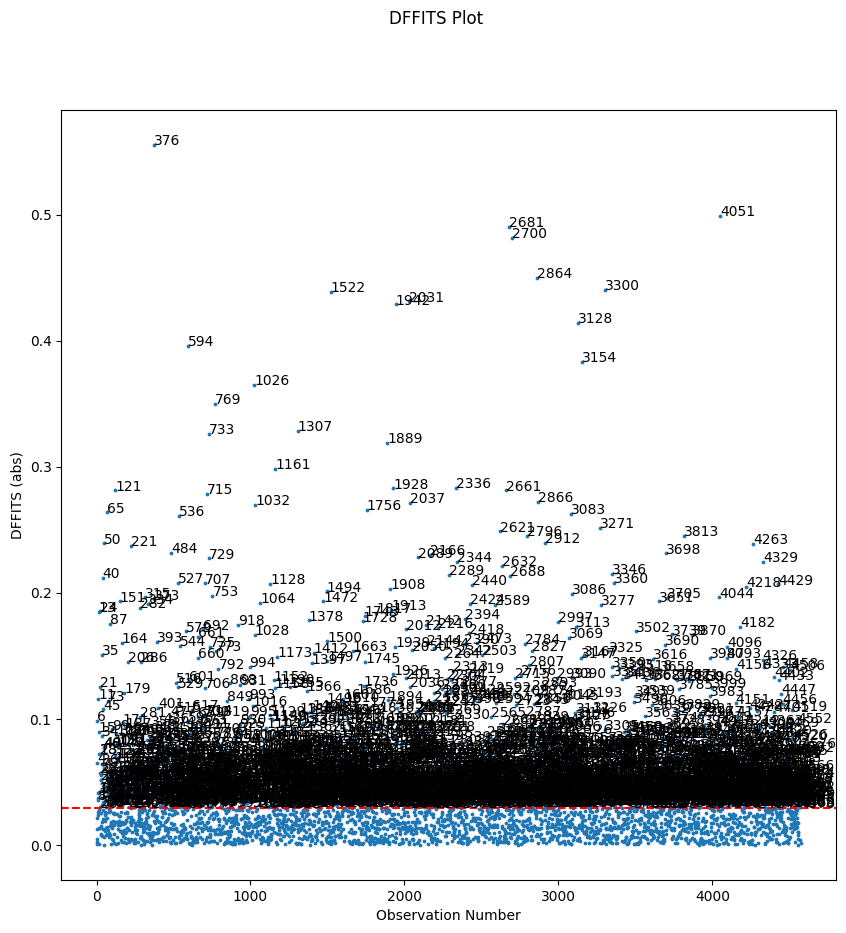

In [39]:


# DFFITS
def plot_dffits(ax, label_level=2 * np.sqrt(len(ride_trans)) / len(ride_trans)):
    # Calculate DFFITS for all observations
    ride_trans["dffits"] = res_trans.get_influence().dffits[0]

    # Plot DFFITS values
    ax.set_ylabel("DFFITS (abs)")
    ax.set_xlabel("Observation Number")
    ax.scatter(ride_trans.index, np.abs(ride_trans["dffits"]), s=3)
    ax.axhline(y=label_level, color='r', linestyle='dashed')

    # Optional: label outliers
    outliers = ride_trans[np.abs(ride_trans["dffits"]) > label_level]
    for i in list(outliers.index):
        ax.annotate(str(i), (i, np.abs(ride_trans["dffits"][i])))

# Create figure
fig, ax = plt.subplots(figsize=(10, 10))
plt.suptitle("DFFITS Plot")

# Plot DFFITS
plot_dffits(ax)

plt.show()



In [40]:

# Store DFBETAS outliers in a dictionary
outliers_dfbetas_all = {}

# Compute DFBETAS once
dfbetas_data = res_trans.get_influence().dfbetas  

# Define feature columns (excluding 'price')
desired_cols = ride_trans.columns[1:14]

# Set outlier threshold
label_level = 0.2 / np.sqrt(len(ride_trans))

# Iterate over each predictor
for i, column in enumerate(desired_cols):
    # Get DFBETAS values
    dfbetas_values = dfbetas_data[:, i]  
    
    # Store outliers
    outliers_dfbetas_all[column] = ride_trans[np.abs(dfbetas_values) > label_level]
    
# Example: Check distance outliers
outliers_dfbetas_all.get("distance", pd.DataFrame()).sort_values(by="distance", ascending=True).head()



price  distance  surge_multiplier  name_Black SUV  name_Lux  \
1038  2.915476      0.03               0.0               0         0   
1453  2.645751      0.39               0.0               0         0   
2157  2.645751      0.39               0.0               0         0   
1793  4.000000      0.39               0.0               0         0   
2759  4.000000      0.39               0.0               0         0   

      name_Lux Black  name_Lux Black XL  name_Lyft  name_Lyft XL  name_Shared  \
1038               0                  0          0             0            0   
1453               0                  0          0             0            0   
2157               0                  0          0             0            0   
1793               0                  0          0             0            0   
2759               0                  0          0             0            0   

      name_UberPool  name_UberX  name_UberXL  name_WAV  residuals  \
1038              0           0            1         0  -0.287624   
1453              0           0            0         1   0.126471   
2157              0           0            0         1   0.126471   
1793              0           0            0         0   0.116903   
2759              0           0            0         0   0.116903   

      fittedvalues    dffits  
1038      3.203100 -0.067002  
1453      2.519280  0.028353  
2157      2.519280  0.028353  
1793      3.883097  0.025801  
2759      3.883097  0.025801

In [41]:



# Compute DFFITS
ride_trans['dffits'] = res_trans.get_influence().dffits[0]

# Define DFFITS threshold
n, p = len(ride_trans), len(res_trans.params)
dffits_threshold = 2 * np.sqrt(p / n)

# Identify DFFITS outliers
outliers_dffits = ride_trans[np.abs(ride_trans['dffits']) > dffits_threshold]

# Ensure desired columns exist before filtering
cols_to_keep = [col for col in desired_cols if col in ride_trans.columns] + ['dffits']
outliers_dffits_selected = outliers_dffits[cols_to_keep]

# Sort by DFFITS
outliers_dffits_sorted = outliers_dffits_selected.sort_values(by='dffits', ascending=True)

# Display top outliers
outliers_dffits_sorted.head()


distance  surge_multiplier  name_Black SUV  name_Lux  name_Lux Black  \
376       4.60          0.916291               0         0               0   
4051      0.64          0.693147               0         0               0   
1522      2.66          0.693147               0         0               0   
3128      7.46          0.000000               0         0               0   
594       7.04          0.000000               0         0               0   

      name_Lux Black XL  name_Lyft  name_Lyft XL  name_Shared  name_UberPool  \
376                   0          1             0            0              0   
4051                  0          1             0            0              0   
1522                  0          1             0            0              0   
3128                  0          0             0            0              1   
594                   0          0             0            0              1   

      name_UberX  name_UberXL  name_WAV    dffits  
376            0            0         0 -0.555447  
4051           0            0         0 -0.498917  
1522           0            0         0 -0.438519  
3128           0            0         0 -0.413849  
594            0            0         0 -0.395891

#### Assumption met?
- Absolutley not lol

## No multicollinearity

In [42]:

# Create a subset with the selected columns (including constant term)
X_selected = sm.add_constant(ride_dummies[desired_cols])

vif_data = pd.DataFrame()
vif_data['Feature'] = X_selected.columns  # The names of the features
vif_data['VIF'] = [vif(X_selected.values, i) for i in range(X_selected.shape[1])]  # Calculate VIF for each feature

# Display max and mean VIF
print("Max VIF = ", max(vif_data['VIF']))
print("Mean VIF = ", np.mean(vif_data['VIF']))

# Show the VIF DataFrame
print(vif_data)

Max VIF =  123.32784495620008
Mean VIF =  10.348761709580105
              Feature         VIF
0               const  123.327845
1            distance    1.003048
2    surge_multiplier    1.036844
3      name_Black SUV    1.760178
4            name_Lux    1.755885
5      name_Lux Black    1.803555
6   name_Lux Black XL    1.740255
7           name_Lyft    1.733173
8        name_Lyft XL    1.789596
9         name_Shared    1.723326
10      name_UberPool    1.782296
11         name_UberX    1.822451
12        name_UberXL    1.794664
13           name_WAV    1.809549


#### Assumption Met?
- This assumption is met!

## Overall Assumption Summary

- This is our final conclusion after running transformations, ADD IF WE WILL KEEP OUR ORIGINAL MODEL OR NOT
#### 1. x vs y is linear
    - This assumption is met

#### 2. The residuals are independent across all values of y

    - This assumption is met

#### 3. The residuals are normally distributed and centered at zero

    - This is not met

#### 4. The residuals have constant variance across all values of x

    - This is met

#### 5. The model describes all observations (i.e., there are no influential points)

    - This is not met

#### 6. Additional predictor variables are unnecessary

    - We feel this assumption is sufficiently met

#### 7. No multicollinearity
    - This is met


#### Quick Note about the Transformation
- Overall it really did not change anything that much for us and in order to preserve interpretability we will choose to stick with our original model

# Check interactions and apply them if needed

C:\Users\ksbuf\AppData\Local\Temp\ipykernel_28432\4229464576.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_options = plt.cm.get_cmap("tab10", num_categories).colors  # Use a colormap for variety


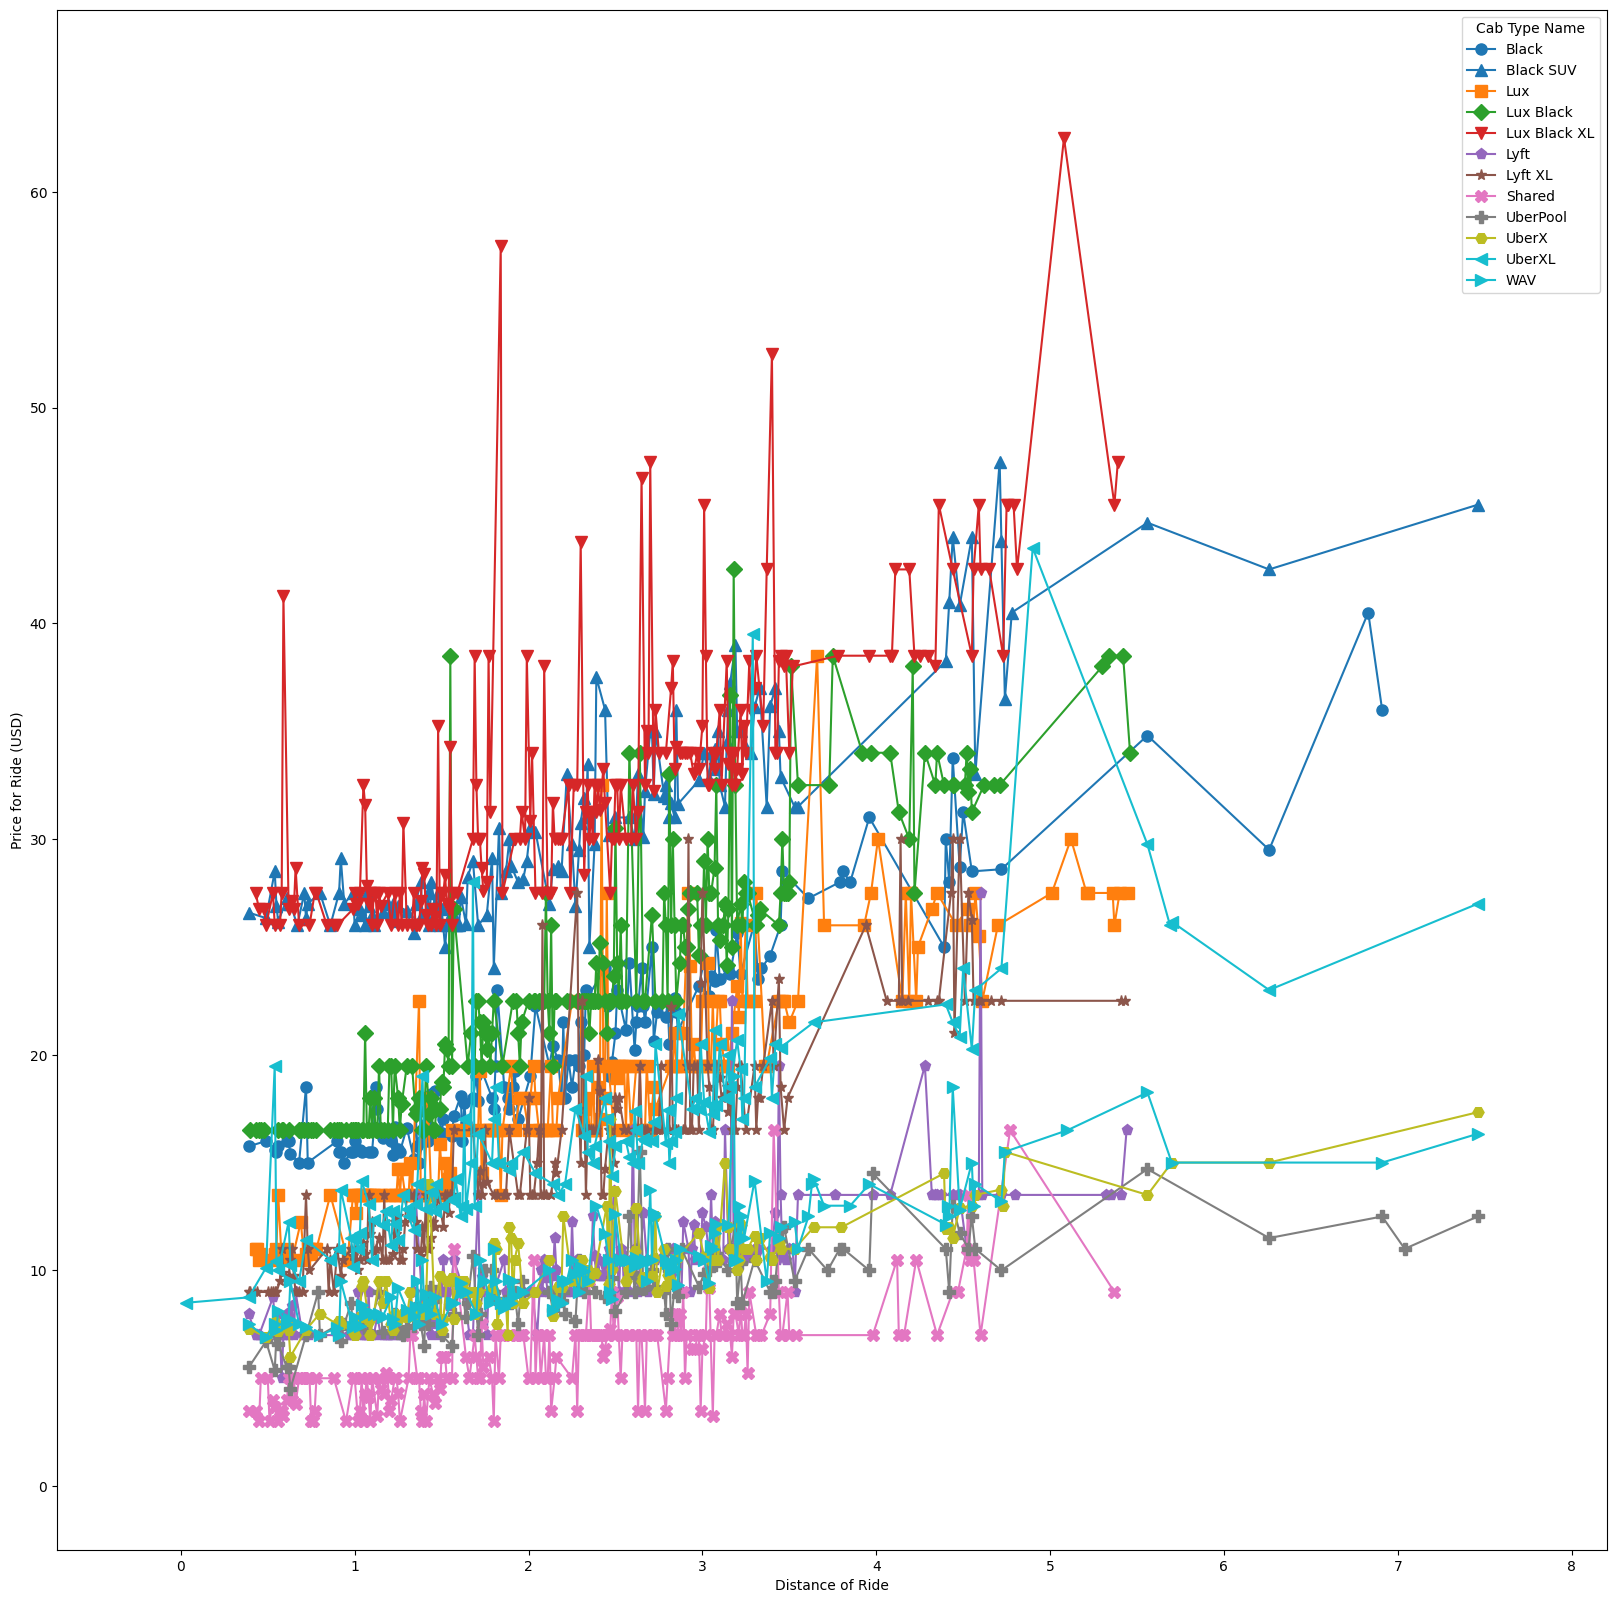

In [43]:

# Generate unique markers and colors for all 12 categories
unique_names = ride['name'].unique()
num_categories = len(unique_names)

# Define at least 12 different markers and colors
marker_options = ['o', '^', 's', 'D', 'v', 'p', '*', 'X', 'P', 'H', '<', '>']  # 12 markers
color_options = plt.cm.get_cmap("tab10", num_categories).colors  # Use a colormap for variety

# Create the interaction plot
fig, ax = plt.subplots(figsize=(20, 20))  # Increased size for clarity
interaction_plot(
    x=ride['distance'],
    trace=ride['name'],
    response=ride['price'],
    colors=color_options[:num_categories],  # Use only the needed colors
    markers=marker_options[:num_categories],  # Use only the needed markers
    ms=8,  # Marker size
    ax=ax
)

# Labels and legend
ax.set_xlabel('Distance of Ride')
ax.set_ylabel('Price for Ride (USD)')
ax.legend(title='Cab Type Name')

plt.show()


- Overall this is deffinetly a mess to look at, but the more that you look at it you can really start to see a similar upward sloping trend across all the variables. I would not say that they are parellel by any means but they are not perpendicular with each other. Again, for interpretibility, we will not choose to include an interaction term.

# Final Model 

- ADD THE MODEL EQUATION HERE

# Model Assesments

## $R^2$

In [44]:
r_squared = res.rsquared
print(f"R-squared: {r_squared}")

R-squared: 0.9307961919921807


- add interpretation

## F-Test

In [45]:
f_statistic = res.fvalue
f_p_value = res.f_pvalue

print(f"F-statistic: {f_statistic}, p-value: {f_p_value}")

F-statistic: 4720.975229460499, p-value: 0.0


- add interpretation

## RMSE

In [46]:
residuals = res.resid

rmse = np.sqrt(np.mean(residuals**2))
print(f"RMSE: {rmse}")

RMSE: 2.385757245799096


- add interpretation

## MAE

In [47]:
mae = np.mean(np.abs(residuals))
print(f"MAE: {mae}")


MAE: 1.7089212795778013


- add interpretation

# Statistical inference

### hypothesis tests for all slopes

In [48]:
# Get t-values, p-values, and coefficients for all predictors
t_values = res.tvalues  # t-statistics
p_values = res.pvalues  # p-values
coefficients = res.params  # Estimated slopes

# Combine results into a DataFrame for better readability
hypothesis_test_results = pd.DataFrame({
    'Coefficient': coefficients,
    't-value': t_values,
    'p-value': p_values
})

# Display results sorted by p-value
hypothesis_test_results.sort_values(by="p-value")


Coefficient    t-value        p-value
distance              2.719139  87.040247   0.000000e+00
surge_multiplier     16.771215  45.321242   0.000000e+00
name_Black SUV       10.180177  59.512824   0.000000e+00
name_Lux Black XL    11.213416  64.706826   0.000000e+00
name_Lyft           -11.163034 -63.968185   0.000000e+00
name_Shared         -13.970184 -80.491249   0.000000e+00
name_UberPool       -11.479852 -67.657657   0.000000e+00
name_UberX          -10.714968 -64.036427   0.000000e+00
name_WAV            -10.499601 -62.482459   0.000000e+00
name_Lyft XL         -5.510806 -32.220776  2.081387e-205
name_UberXL          -4.668550 -27.643979  1.168918e-155
name_Lux             -3.034356 -17.608029   3.410728e-67
name_Lux Black        2.296137  13.578229   3.372451e-41
const                -2.492376  -6.354509   2.295111e-10

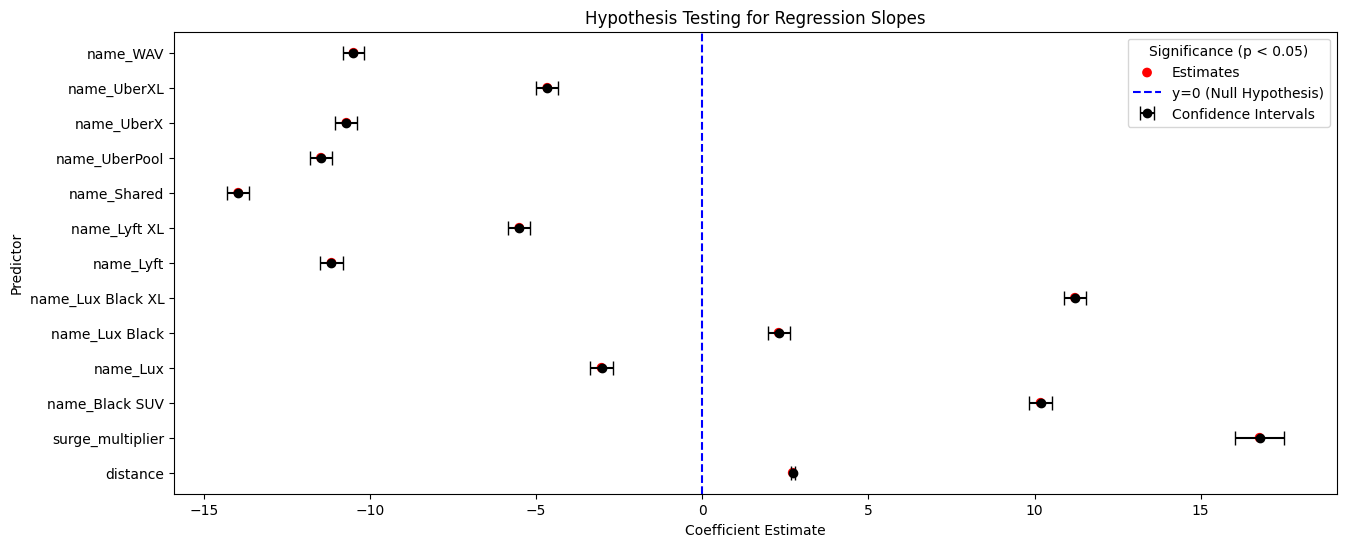

In [49]:

# Construct hypothesis test data frame
res_hypothesis_test = {
    'term': res.params.index.tolist(),
    'coef': res.params.tolist(),
    'conf_low': res.conf_int().loc[:, 0].tolist(),
    'conf_high': res.conf_int().loc[:, 1].tolist(),
    't_value': res.tvalues.tolist(),
    'p_value': res.pvalues.tolist()
}

df_hypothesis = pd.DataFrame(res_hypothesis_test)

# Selecting just slopes (excluding intercept)
df_hypothesis = df_hypothesis[df_hypothesis['term'] != 'const']

# Define a significance threshold (e.g., 0.05)
df_hypothesis['significant'] = df_hypothesis['p_value'] < 0.05

# Plot hypothesis test results
plt.figure(figsize=(15, 6))

# Plot confidence intervals using error bars
plt.errorbar(df_hypothesis['coef'], df_hypothesis['term'],
             xerr=[df_hypothesis['coef'] - df_hypothesis['conf_low'], 
                   df_hypothesis['conf_high'] - df_hypothesis['coef']], 
             fmt='o', capsize=5, color='black', label='Confidence Intervals')

# Scatter plot for coefficients, color-coded by significance
plt.scatter(df_hypothesis['coef'], df_hypothesis['term'], 
            c=df_hypothesis['significant'].map({True: 'red', False: 'gray'}), 
            label='Estimates')

plt.axvline(0, color='blue', linestyle='--', label='y=0 (Null Hypothesis)')
plt.xlabel('Coefficient Estimate')
plt.ylabel('Predictor')
plt.legend(title="Significance (p < 0.05)")
plt.title('Hypothesis Testing for Regression Slopes')
plt.show()


#### ADD SUMMARY HERE
 - you can group these together as "significant" or "not" in your interpretation

### confidence intervals for all slopes

In [50]:
res.conf_int()

0          1
const              -3.261320  -1.723432
distance            2.657893   2.780384
surge_multiplier   16.045734  17.496696
name_Black SUV      9.844819  10.515534
name_Lux           -3.372203  -2.696510
name_Lux Black      1.964610   2.627663
name_Lux Black XL  10.873673  11.553160
name_Lyft         -11.505156 -10.820911
name_Lyft XL       -5.846113  -5.175499
name_Shared       -14.310448 -13.629919
name_UberPool     -11.812499 -11.147206
name_UberX        -11.043008 -10.386928
name_UberXL        -4.999639  -4.337461
name_WAV          -10.829042 -10.170160

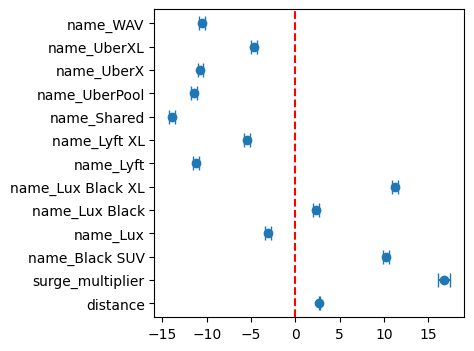

In [51]:
# Construct confidence interval data frame.
res_conf_int = {
    'term': res.conf_int().index.tolist(),
    'coef': res.params.tolist(),
    'conf_low': res.conf_int().loc[:, 0].tolist(),
    'conf_high': res.conf_int().loc[:, 1].tolist()
}

df = pd.DataFrame(res_conf_int)

# Selecting just slopes
df = df[df['term'] != 'const']

# Plotting the confidence interval
plt.figure(figsize=(4, 4))
# plt.errorbar(df['term'], df['coef'], 
#              yerr=[df['coef'] - df['conf_low'], df['conf_high'] - df['coef']], 
#              fmt='o', capsize=5, label='Estimates')
# plt.axhline(0, color='red', linestyle='--', label='y=0')
plt.errorbar(df['coef'], df['term'],
             xerr=[df['coef'] - df['conf_low'], df['conf_high'] - df['coef']], 
             fmt='o', capsize=5, label='Estimates')
plt.axvline(0, color='red', linestyle='--', label='y=0')

- ADD SUMMARY OF THIS take extra care in providing accurate interpretations if your model includes an interaction term

### confidence interval for the mean of  $ Y $


In [52]:
#add our constant
X = sm.add_constant(ride_trim[desired_cols])

#get our predictions
pred = res.get_prediction(X)

# Extract confidence intervals for the mean of Y
ci_summary = pred.summary_frame(alpha=0.05).loc[:, ['mean_ci_lower', 'mean_ci_upper']]

# Show the confidence intervals
print(ci_summary**2)

      mean_ci_lower  mean_ci_upper
0        125.578191     137.380808
1         59.268379      66.875151
2        137.975612     152.115708
3        180.872014     194.020637
4        388.874074     409.088939
...             ...            ...
4572     430.542988     454.251156
4573     113.238940     123.454379
4574     162.651073     175.317857
4575     961.848513     992.252730
4576     116.454613     129.618468

[4577 rows x 2 columns]


- ADD COMMENTS HERE

### prediction interval for an individual observation

In [63]:
import statsmodels.api as sm

# Ensure correct feature selection (including the intercept)
desired_cols = ['const', 'distance', 'surge_multiplier', 'name_Black SUV', 'name_Lux', 
                'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 
                'name_Shared', 'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV']

# Select the first row for prediction
new_row = ride_trim.iloc[[10]][desired_cols[1:]]  # Exclude 'const' for now

# Manually add the 'const' column with a value of 1
new_row['const'] = 1

# Reorder columns to ensure they match the model's training data
new_row_with_const = new_row[res.model.exog_names]  # Align columns with the model's training data

# Make the prediction
pred = res.get_prediction(new_row_with_const)

# Get the prediction summary, including confidence and prediction intervals
pred_summary = pred.summary_frame(alpha=0.05)  # 95% confidence level

# Display only the prediction interval
print("Prediction Interval for the selected record:")
print(pred_summary[['obs_ci_lower', 'obs_ci_upper']])


Prediction Interval for the selected record:
    obs_ci_lower  obs_ci_upper
10     28.985613      38.36818


In [66]:
#print the observation from above
ride_trim.iloc[10]

price                37.000000
distance              3.390000
surge_multiplier      1.000000
name_Black SUV        1.000000
name_Lux              0.000000
name_Lux Black        0.000000
name_Lux Black XL     0.000000
name_Lyft             0.000000
name_Lyft XL          0.000000
name_Shared           0.000000
name_UberPool         0.000000
name_UberX            0.000000
name_UberXL           0.000000
name_WAV              0.000000
residuals             3.323103
fittedvalues         33.676897
dffits                0.075605
Name: 10, dtype: float64

-ADD COMMENTS AND INTERPRETATIONS

# Summary and Next Steps